# Projecto Desafío 1- Equipo: Los Internacionales
Federico Aballoy, Federico Baiocco, Veronica Bianchini, Andrea Campetella, Micaela Marzoa, Christian Vergara

### Objetivo: Entender qué variables afectan el desempeño escolar de los alumnos Argentinos

## Paso 1- Análisis Exploratorio (EDA)

En este paso:

1. Importaremos las librerías a usar y los datos necesarios para armar nuestra base de datos. 
2. Los datos que necesitamos se encuentran alojados en diversos archivos, por lo cual el segundo paso será combinarlos en un dataset para el análisis.
3. Analizaremos la forma de nuestro dataset: que información tenemos, cuáles son las variables, su tipo, número de casos
4. Identificaremos la cantidad de casos nulos o no responde. 
5. Correremos análisis descriptivos de nuestras variable para entender media, mediana, moda, desvío, máx y min.
6. Correremos histogramas de nuestras variables.
7. Buscaremos correlaciones entre variables del dataset.
8. Terminaremos de procesar los datos y limpiar el dataset para poder modelar: nos encargaremos de los nulos, excluiremos variables del data set final, convertiremos las variables necesarias en dummy y aplicaremos ponderadores.
9. Antes de modelar, analizaremos nuevamente los datos reprocesados, siguiendo la metodología de los pasos 5-7.

### Paso 1.1 Importar Librerías y archivos

In [1]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
app_alumno = pd.read_csv('../datos/csv_files/app_alumno.csv')
app_nivel = pd.read_csv('../datos/csv_files/app_nivel.csv')
app_escuela = pd.read_csv('../datos/csv_files/app_escuela.csv')
app_provincia = pd.read_csv('../datos/csv_files/app_provincia.csv')
app_departamento = pd.read_csv('../datos/csv_files/app_departamento.csv')
app_cargo = pd.read_csv('../datos/csv_files/app_cargo.csv')
app_curso = pd.read_csv('../datos/csv_files/app_curso.csv')
app_subnivel = pd.read_csv('../datos/csv_files/app_subnivel.csv')
app_nivel = pd.read_csv('../datos/csv_files/app_nivel.csv')
app_gastonivel = pd.read_csv('../datos/csv_files/app_gastonivel.csv')
app_salario = pd.read_csv('../datos/csv_files/app_salario.csv')

### Paso 1.2  Armado del dataset

Empezaremos por entender la forma de nuestro dataset base: app_alumnos. 
Como decidimos incluir algunas tablas extra para tener más información relacionada a los alumnos, haremos un merge entre las tablas que correspondan.

In [3]:
app_alumno.shape

(1835710, 25)

In [4]:
app_alumno.columns

Index(['id', 'sexo', 'indice_socioeconomico', 'nivel_desemp_matematica',
       'nivel_desemp_lengua', 'nivel_desemp_ciencias_sociales',
       'nivel_desemp_ciencias_naturales', 'ponderador_lengua',
       'ponderador_matematica', 'ponderador_ciencias_naturales',
       'ponderador_ciencias_sociales', 'tiene_notebook', 'tiene_pc',
       'tiene_tablet', 'tiene_celular', 'tiene_smartphone', 'tiene_consola',
       'tiene_smarttv', 'tiene_cable', 'tiene_internet', 'repeticion_primaria',
       'repeticion_secundaria', 'escuela_id', 'nivel_id', 'year_id'],
      dtype='object')

## APP_ALUMNO

#### Primeros filtros y columnas de interes

Como primer filtro, decidimos excluir los resultados de 2013 por la discontinuidad anual, la metodología diversa con la que se tomaron las pruebas y las reformas en políticas educativas que se efectuaron tras ese periodo: siento todas estas variables que no podemos plasmar en el modelo, excluir 2013 nos permite evitar "ruido" en el mismo. 

También decidimos hacer foco en las escuelas primarias y en el desempeño en lengua, para acotar el universo de análisis. 

In [5]:
filtro_primaria = app_alumno['nivel_id'] == 2
filtro_ano = app_alumno['year_id'] > 2015
columnas_interes = ['sexo', 'indice_socioeconomico','nivel_desemp_lengua','ponderador_lengua',
                   'repeticion_primaria','escuela_id', 'nivel_id', 'year_id']
data = app_alumno[(filtro_primaria) & (filtro_ano)]
data = data[columnas_interes]
data.head()

,sexo,indice_socioeconomico,nivel_desemp_lengua,ponderador_lengua,repeticion_primaria,escuela_id,nivel_id,year_id
372394,f,medio,avanzado,1.309467,no,220564311,2,2016
372533,f,medio,basico,3.470589,no,220782111,2,2016
372542,nc,nc,satisfactorio,1.419299,nc,60000303,2,2016
372543,f,nc,satisfactorio,1.084899,no,60030003,2,2016
372544,nc,alto,avanzado,1.704434,no,60300003,2,2016


In [6]:
data.shape

(1101518, 8)

## APP_ESCUELA

Renombramos las columnas de escuela para que tengan el prefijo escuela_

In [7]:
for col in app_escuela.columns:
    app_escuela = app_escuela.rename(columns={col: f"escuela_{col}"})

In [8]:
app_escuela.head(1)

,escuela_id,escuela_ambito,escuela_gestion,escuela_icse,escuela_icse_cat,escuela_indice_socioeconomico_medio,escuela_indice_socioeconomico_medio_cat,escuela_tecnica,escuela_tiene_internet,escuela_subvencion,escuela_dependencia,escuela_departamento_id,escuela_provincia_id
0,11341915221,urbano,estatal,0.656,critico,1.0,tercil_bajo,f,f,No corresponde,provincial,178.0,13


In [9]:
data = pd.merge(data, app_escuela, on='escuela_id', how='left')
data.shape

(1101518, 20)

### Paso 3: Forma del dataset

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1101518 entries, 0 to 1101517
Data columns (total 20 columns):
 #   Column                                   Non-Null Count    Dtype  
---  ------                                   --------------    -----  
 0   sexo                                     1101518 non-null  object 
 1   indice_socioeconomico                    1101518 non-null  object 
 2   nivel_desemp_lengua                      561632 non-null   object 
 3   ponderador_lengua                        1037569 non-null  float64
 4   repeticion_primaria                      1101518 non-null  object 
 5   escuela_id                               1101518 non-null  int64  
 6   nivel_id                                 1101518 non-null  int64  
 7   year_id                                  1101518 non-null  int64  
 8   escuela_ambito                           1101518 non-null  object 
 9   escuela_gestion                          1101518 non-null  object 
 10  escuela_icse      

## APP_DEPARTAMENTO

In [11]:
app_departamento.head(1)

,id,name,tasa_con_nbi,provincia_id
0,9,Escobar,0.11607,0


In [12]:
app_departamento = app_departamento[['tasa_con_nbi','id']]
app_departamento.columns = ['departamento_tasa_con_nbi', 'departamento_id']
app_departamento.head(1)

,departamento_tasa_con_nbi,departamento_id
0,0.11607,9


In [13]:
data = pd.merge(data, app_departamento, 
                how='left',
                left_on='escuela_departamento_id',
                right_on='departamento_id').drop(['departamento_id','escuela_departamento_id'], axis=1)
data.head(3)

,sexo,indice_socioeconomico,nivel_desemp_lengua,ponderador_lengua,repeticion_primaria,escuela_id,nivel_id,year_id,escuela_ambito,escuela_gestion,escuela_icse,escuela_icse_cat,escuela_indice_socioeconomico_medio,escuela_indice_socioeconomico_medio_cat,escuela_tecnica,escuela_tiene_internet,escuela_subvencion,escuela_dependencia,escuela_provincia_id,departamento_tasa_con_nbi
0,f,medio,avanzado,1.309467,no,220564311,2,2016,urbano,privada,-1.000,NaN,2.219780,tercil_alto,f,t,Subvención Total,provincial,4,0.041508
1,f,medio,basico,3.470589,no,220782111,2,2016,urbano,estatal,0.306,bajo_y_medio,1.800000,tercil_medio,f,t,No corresponde,provincial,4,0.113085
2,nc,nc,satisfactorio,1.419299,nc,60000303,2,2016,urbano,privada,-1.000,NaN,2.173913,tercil_alto,f,t,Subvención Total,provincial,4,0.126584


## APP_GASTONIVEL

In [14]:
app_gastonivel.head(1)

,id,name,value,provincia_id,year_id
0,1,inicial+primaria,9901979445,0,2011


In [15]:
app_gastonivel = app_gastonivel[app_gastonivel['name']=='inicial+primaria']
app_gastonivel = app_gastonivel[['provincia_id','year_id','value']]
app_gastonivel.columns = ['provincia_id','year_id','gasto_provincia_primaria_inicial']
app_gastonivel = app_gastonivel[app_gastonivel.year_id > 2015].dropna()
app_gastonivel.head(1)

,provincia_id,year_id,gasto_provincia_primaria_inicial
25,0,2016,40563029196


In [16]:
app_gastonivel.year_id.unique()

array([2016], dtype=int64)

Tenemos solo 2016, lo cual podría significar un sesgo al modelo. Decidimos no incluir estas variables.

## Cargo

In [17]:
app_cargo.head(6)

,id,name,total,cubierto,no_cubierto,escuela_id,nivel_id,year_id
0,1,direccion,1,1,0,420000707,1,2011
1,2,frente_a_alunos,4,4,0,420000707,1,2011
2,3,apoyo,2,2,0,420000707,1,2011
3,4,direccion,2,2,0,840477414,2,2011
4,5,frente_a_alunos,8,8,0,840477414,2,2011
5,6,apoyo,4,3,1,840477414,2,2011


Cargos en una escuela:

In [18]:
app_cargo[(app_cargo.escuela_id == 977929616) & (app_cargo.year_id > 2015)]

,id,name,total,cubierto,no_cubierto,escuela_id,nivel_id,year_id
1181,1181,direccion,4,4,0,977929616,2,2016
1182,1182,frente_a_alunos,22,22,0,977929616,2,2016
1183,1183,apoyo,6,6,0,977929616,2,2016
769778,769775,direccion,4,4,0,977929616,2,2017
769779,769776,frente_a_alunos,21,21,0,977929616,2,2017
769780,769777,apoyo,6,6,0,977929616,2,2017


In [19]:
app_cargo.shape

(852256, 8)

In [20]:
cargos = app_cargo[app_cargo.name.isin(['direccion','frente_a_alunos','apoyo'])]
cargos = cargos[cargos.year_id > 2015]
cargos = cargos[cargos.nivel_id == 2]
cargos.shape

(87027, 8)

In [21]:
cargos.head()

,id,name,total,cubierto,no_cubierto,escuela_id,nivel_id,year_id
1176,1176,direccion,4,4,0,793066313,2,2016
1177,1177,frente_a_alunos,27,27,0,793066313,2,2016
1178,1178,apoyo,4,4,0,793066313,2,2016
1179,1179,frente_a_alunos,1,1,0,907816515,2,2016
1181,1181,direccion,4,4,0,977929616,2,2016


In [22]:
cargos.year_id.unique()

array([2016, 2017], dtype=int64)

Tenemos 2016 y 2017. -> OK

Para poder obtener la cantidad de cargos cubiertos de cada tipo, creamos un dataframe por cada tipo de los que nos interesa analizar (apoyo, direccion y frente a alumnos)

In [23]:
cargo_direccion_df = cargos[cargos['name'] == 'direccion'][['cubierto','escuela_id','year_id']]
cargo_direccion_df.columns = ['cargo_direccion','escuela_id','year_id']
cargo_faa_df = cargos[cargos['name'] == 'frente_a_alunos'][['cubierto','escuela_id','year_id']]
cargo_faa_df.columns = ['cargo_frente_a_alumnos','escuela_id','year_id']
cargo_apoyo_df = cargos[cargos['name'] == 'apoyo'][['cubierto','escuela_id','year_id']]
cargo_apoyo_df.columns = ['cargo_apoyo','escuela_id','year_id']

In [24]:
cargo_apoyo_df[cargo_apoyo_df.escuela_id == 793066313]

,cargo_apoyo,escuela_id,year_id
1178,4,793066313,2016
780057,3,793066313,2017


In [25]:
data = pd.merge(data, cargo_direccion_df, how='left', on=['escuela_id','year_id'])
data = pd.merge(data, cargo_faa_df, how='left', on=['escuela_id','year_id'])
data = pd.merge(data, cargo_apoyo_df, how='left', on=['escuela_id','year_id'])
data.head(5)

,sexo,indice_socioeconomico,nivel_desemp_lengua,ponderador_lengua,repeticion_primaria,escuela_id,nivel_id,year_id,escuela_ambito,escuela_gestion,...,escuela_indice_socioeconomico_medio_cat,escuela_tecnica,escuela_tiene_internet,escuela_subvencion,escuela_dependencia,escuela_provincia_id,departamento_tasa_con_nbi,cargo_direccion,cargo_frente_a_alumnos,cargo_apoyo
0,f,medio,avanzado,1.309467,no,220564311,2,2016,urbano,privada,...,tercil_alto,f,t,Subvención Total,provincial,4,0.041508,3.0,14.0,2.0
1,f,medio,basico,3.470589,no,220782111,2,2016,urbano,estatal,...,tercil_medio,f,t,No corresponde,provincial,4,0.113085,3.0,27.0,4.0
2,nc,nc,satisfactorio,1.419299,nc,60000303,2,2016,urbano,privada,...,tercil_alto,f,t,Subvención Total,provincial,4,0.126584,3.0,14.0,2.0
3,f,nc,satisfactorio,1.084899,no,60030003,2,2016,urbano,privada,...,tercil_alto,f,t,Subvención Total,provincial,4,0.023543,3.0,30.0,NaN
4,nc,alto,avanzado,1.704434,no,60300003,2,2016,urbano,estatal,...,tercil_alto,f,t,No corresponde,provincial,4,0.023543,5.0,58.0,NaN


In [26]:
data.cargo_direccion.isna().sum()

30230

In [27]:
data.cargo_apoyo.isna().sum()

415717

In [28]:
data.cargo_frente_a_alumnos.isna().sum()

10017

In [29]:
data.shape

(1101518, 23)

## APP_CURSO

In [30]:
app_curso.head()

,id,matricula,matricula_femenino,matricula_masculino,repitentes,sobreedad,promovidos,no_promovidos,salidos_con_pase,salidos_sin_pase,escuela_id,subnivel_id,year_id
0,420000707201104,32,10,22,0,0,0,0,0,0,420000707,5,2011
1,420000707201105,26,12,14,0,0,0,0,0,0,420000707,6,2011
2,420000707201106,28,11,17,0,0,0,0,0,0,420000707,7,2011
3,918751515201115,134,51,83,33,76,145,0,6,6,918751515,16,2011
4,918751515201116,166,80,86,20,91,188,0,6,3,918751515,17,2011


Nos interesa la cantidad de alumnos por curso (en realidad por sub-nivel, pero no tenemos los datos necesarios para saber a que subnivel pertenece cada alumno, por lo que lo hacemos a nivel curso)

In [31]:
app_curso = app_curso[['escuela_id','year_id','matricula']]
app_curso = app_curso[app_curso['year_id'] > 2015]
app_curso.head()

,escuela_id,year_id,matricula
2219,907816515,2016,3
2220,1038715317,2016,68
2221,1038715317,2016,59
2222,1038715317,2016,84
2223,1091005218,2016,40


In [32]:
app_curso.year_id.unique()

array([2016, 2017], dtype=int64)

Tenemos 2016 y 2017 -->OK

In [33]:
app_curso.columns = ['escuela_id','year_id','cant_alumnos_curso']

Agrupamos por escuela y año y hacemos la sumatoria de todos los alumnos en ese año, esa escuela, nivel 2 (primaria)

In [34]:
grouped = app_curso.groupby(by=['escuela_id','year_id'], as_index=False).sum()

In [35]:
grouped[grouped.escuela_id == 60000303]

,escuela_id,year_id,cant_alumnos_curso
0,60000303,2016,721
1,60000303,2017,733


In [36]:
data = pd.merge(data, grouped, how='left', on=['escuela_id','year_id'])
data.head()

,sexo,indice_socioeconomico,nivel_desemp_lengua,ponderador_lengua,repeticion_primaria,escuela_id,nivel_id,year_id,escuela_ambito,escuela_gestion,...,escuela_tecnica,escuela_tiene_internet,escuela_subvencion,escuela_dependencia,escuela_provincia_id,departamento_tasa_con_nbi,cargo_direccion,cargo_frente_a_alumnos,cargo_apoyo,cant_alumnos_curso
0,f,medio,avanzado,1.309467,no,220564311,2,2016,urbano,privada,...,f,t,Subvención Total,provincial,4,0.041508,3.0,14.0,2.0,1107.0
1,f,medio,basico,3.470589,no,220782111,2,2016,urbano,estatal,...,f,t,No corresponde,provincial,4,0.113085,3.0,27.0,4.0,474.0
2,nc,nc,satisfactorio,1.419299,nc,60000303,2,2016,urbano,privada,...,f,t,Subvención Total,provincial,4,0.126584,3.0,14.0,2.0,721.0
3,f,nc,satisfactorio,1.084899,no,60030003,2,2016,urbano,privada,...,f,t,Subvención Total,provincial,4,0.023543,3.0,30.0,NaN,846.0
4,nc,alto,avanzado,1.704434,no,60300003,2,2016,urbano,estatal,...,f,t,No corresponde,provincial,4,0.023543,5.0,58.0,NaN,656.0


In [37]:
data.shape

(1101518, 24)

## APP_SALARIO

In [38]:
app_salario.head()

,id,name,value,provincia_id,year_id
0,1,maestro_inicial,3239.80,4,2011
1,2,maestro_inicial,3952.38,4,2012
2,3,maestro_inicial,4927.31,4,2013
3,4,maestro_inicial,6458.29,4,2014
4,5,maestro_inicial,8521.76,4,2015


In [39]:
app_salario = app_salario[app_salario.year_id > 2015]
app_salario.year_id.unique()

array([2016], dtype=int64)

Tenemos solo 2016 asique no lo agregamos.

## Data gasto nivel

Agregamos datos sobre el nivel de gastos por provincia en educación. Estos datos están trabajados y ajustados según el precio del dolar promedio a cada año para tener en cuenta la inflación.

In [40]:
gastonivel = pd.read_csv('../datos/extra-andy/data_gastonivelweb_raw.csv').dropna().drop_duplicates(['provincia_id','year_id'])

In [41]:
gastonivel.head(5)

,Unnamed: 0,name,provincia_id,year_id,inicial.primaria,secundaria,snu,sin_discriminar,privada
0,1,Buenos Aires,0,2016,4.056303e+10,37968909768,5.107257e+09,1.774424e+10,1.442394e+10
1,2,Buenos Aires,0,2017,5.127879e+10,45138663938,8.498108e+09,2.285623e+10,1.819973e+10
2,3,Catamarca,1,2016,2.130927e+09,1719851162,3.870598e+08,5.298175e+08,4.989893e+08
3,4,Catamarca,1,2017,2.560244e+09,2343360512,5.610163e+08,7.517471e+08,6.309851e+08
4,5,Chaco,2,2016,5.649604e+09,4281190065,7.190005e+08,1.811722e+09,1.029350e+09


In [42]:
gastonivel = gastonivel[['provincia_id','year_id','inicial.primaria']]
gastonivel = gastonivel[gastonivel['year_id'] > 2015]
gastonivel.head(3)

,provincia_id,year_id,inicial.primaria
0,0,2016,4.056303e+10
1,0,2017,5.127879e+10
2,1,2016,2.130927e+09


Por ejemplo: Gasto en provincia con id 4

In [43]:
gastonivel[(gastonivel.provincia_id == 4)]

,provincia_id,year_id,inicial.primaria
8,4,2016,9.998135e+09
9,4,2017,1.275583e+10


In [44]:
data = data.rename(columns={'escuela_provincia_id':'provincia_id'})

In [45]:
data = pd.merge(data, gastonivel, how='left', on=['provincia_id','year_id'])
data.head(5)

,sexo,indice_socioeconomico,nivel_desemp_lengua,ponderador_lengua,repeticion_primaria,escuela_id,nivel_id,year_id,escuela_ambito,escuela_gestion,...,escuela_tiene_internet,escuela_subvencion,escuela_dependencia,provincia_id,departamento_tasa_con_nbi,cargo_direccion,cargo_frente_a_alumnos,cargo_apoyo,cant_alumnos_curso,inicial.primaria
0,f,medio,avanzado,1.309467,no,220564311,2,2016,urbano,privada,...,t,Subvención Total,provincial,4,0.041508,3.0,14.0,2.0,1107.0,9.998135e+09
1,f,medio,basico,3.470589,no,220782111,2,2016,urbano,estatal,...,t,No corresponde,provincial,4,0.113085,3.0,27.0,4.0,474.0,9.998135e+09
2,nc,nc,satisfactorio,1.419299,nc,60000303,2,2016,urbano,privada,...,t,Subvención Total,provincial,4,0.126584,3.0,14.0,2.0,721.0,9.998135e+09
3,f,nc,satisfactorio,1.084899,no,60030003,2,2016,urbano,privada,...,t,Subvención Total,provincial,4,0.023543,3.0,30.0,NaN,846.0,9.998135e+09
4,nc,alto,avanzado,1.704434,no,60300003,2,2016,urbano,estatal,...,t,No corresponde,provincial,4,0.023543,5.0,58.0,NaN,656.0,9.998135e+09


In [46]:
data = data.rename(columns={'inicial.primaria':'gasto_inicial_primaria'})

In [47]:
data.shape

(1101518, 25)

Comprobamos que tenemos la misma cantidad de registros (1101518) que al momento en que aplicamos los filtros a el dataset de alumnos. Esto es para corroborar que no hayamos cometido algún error en un merge, duplicando columnas o perdiendo algún dato.

## Datos cruzados

In [48]:
#data.to_csv('datos_cruzados_v2.csv', index=False)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1101518 entries, 0 to 1101517
Data columns (total 25 columns):
 #   Column                                   Non-Null Count    Dtype  
---  ------                                   --------------    -----  
 0   sexo                                     1101518 non-null  object 
 1   indice_socioeconomico                    1101518 non-null  object 
 2   nivel_desemp_lengua                      561632 non-null   object 
 3   ponderador_lengua                        1037569 non-null  float64
 4   repeticion_primaria                      1101518 non-null  object 
 5   escuela_id                               1101518 non-null  int64  
 6   nivel_id                                 1101518 non-null  int64  
 7   year_id                                  1101518 non-null  int64  
 8   escuela_ambito                           1101518 non-null  object 
 9   escuela_gestion                          1101518 non-null  object 
 10  escuela_icse      

### Variables categóricas

In [50]:
categorical = []
cant_dummies = 0
for col in data.columns:
    if data[col].dtypes == 'object':
        categorical.append(col)
        print(f"{col} - cantidad de valores unicos: {data[col].nunique()}")
        cant_dummies += data[col].nunique()

sexo - cantidad de valores unicos: 3
indice_socioeconomico - cantidad de valores unicos: 4
nivel_desemp_lengua - cantidad de valores unicos: 5
repeticion_primaria - cantidad de valores unicos: 5
escuela_ambito - cantidad de valores unicos: 2
escuela_gestion - cantidad de valores unicos: 3
escuela_icse_cat - cantidad de valores unicos: 3
escuela_indice_socioeconomico_medio_cat - cantidad de valores unicos: 3
escuela_tecnica - cantidad de valores unicos: 2
escuela_tiene_internet - cantidad de valores unicos: 2
escuela_subvencion - cantidad de valores unicos: 8
escuela_dependencia - cantidad de valores unicos: 4


### Variables continuas

In [51]:
num = []
for col in data.columns:
    if data[col].dtypes != 'object':
        print(col)
        num.append(col)

ponderador_lengua
escuela_id
nivel_id
year_id
escuela_icse
escuela_indice_socioeconomico_medio
provincia_id
departamento_tasa_con_nbi
cargo_direccion
cargo_frente_a_alumnos
cargo_apoyo
cant_alumnos_curso
gasto_inicial_primaria


## Paso 1.4: Nulos

Detectamos distintos tipos de valores faltantes. En algunos casos puede ser 'nc', en otros -1.

Funcion que retorna una tabla con los valores faltantes especificados en miss_value

In [52]:
def miss_data(df, miss_value):
    x = ['variable','cantidad', 'porcentaje']
    missing_data = pd.DataFrame(columns=x)
    columns = df.columns
    for col in columns:
        icolumn_name = col
        imissing_data = df[df[col]==miss_value].shape[0]
        imissing_in_percentage = (df[df[col]==miss_value].shape[0]/df[col].shape[0])*100
        missing_data.loc[len(missing_data)] = [icolumn_name, imissing_data, imissing_in_percentage]
    return missing_data.set_index('variable').sort_values(by='porcentaje',ascending=False)

#### faltantes

In [53]:
nulls = pd.DataFrame(data.isnull().sum().sort_values(ascending=False), columns=['nulls'])
nulls['porcentaje'] = round(100*nulls['nulls'] / len(data), 2)
nulls[nulls.nulls>0]

,nulls,porcentaje
nivel_desemp_lengua,539886,49.01
cargo_apoyo,415717,37.74
escuela_icse_cat,336746,30.57
escuela_tiene_internet,66656,6.05
ponderador_lengua,63949,5.81
gasto_inicial_primaria,32488,2.95
cargo_direccion,30230,2.74
escuela_indice_socioeconomico_medio_cat,10248,0.93
cargo_frente_a_alumnos,10017,0.91
cant_alumnos_curso,721,0.07


In [54]:
print(f'Total: {nulls.nulls.sum()}')

Total: 1507022


#### nc

In [55]:
nc = miss_data(data, 'nc')
nc[nc.cantidad>0]

,cantidad,porcentaje
variable,,
indice_socioeconomico,194107,17.621773
sexo,144360,13.105551
repeticion_primaria,78394,7.116906
nivel_desemp_lengua,63949,5.805534


#### -1

In [56]:
neg = miss_data(data, -1)
neg[neg.cantidad>0]

,cantidad,porcentaje
variable,,
ponderador_lengua,539886,49.012908
escuela_icse,336746,30.571085
departamento_tasa_con_nbi,221668,20.123865
escuela_indice_socioeconomico_medio,10248,0.930352


## Paso 1.5 y 1.6: Análisis de variables e histogramas

#### escuela_icse

In [57]:
data.escuela_icse.describe()

count    1.101518e+06
mean    -8.855046e-02
std      6.187333e-01
min     -1.000000e+00
25%     -1.000000e+00
50%      2.070000e-01
75%      3.570000e-01
max      9.110000e-01
Name: escuela_icse, dtype: float64

Los -1 son valores faltantes en este caso, por lo tanto los descartamos para graficar la distribución.

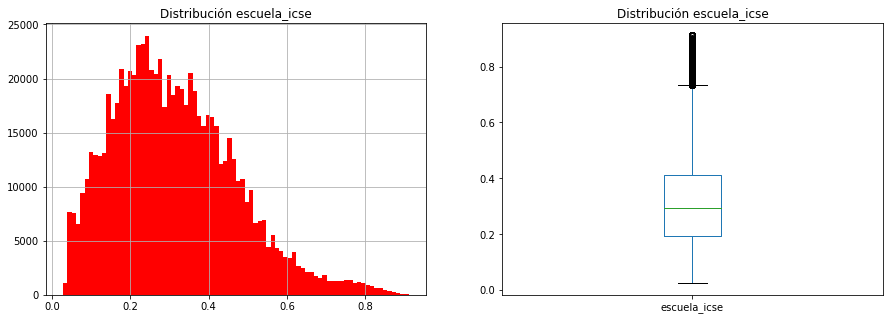

In [58]:
_, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].ticklabel_format(style = 'plain')
axes[0].title.set_text('Distribución escuela_icse')
axes[1].title.set_text('Distribución escuela_icse')
data[data['escuela_icse'] > 0].escuela_icse.hist(bins=80, ax=axes[0], color='r');
data[data['escuela_icse'] > 0].escuela_icse.plot(kind='box', ax=axes[1]);
plt.show()

#### repeticion_primaria

In [59]:
data.repeticion_primaria.describe()

count     1101518
unique          5
top            no
freq       907258
Name: repeticion_primaria, dtype: object

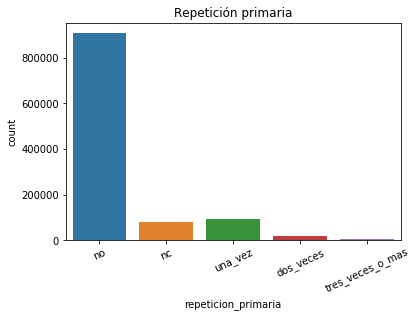

In [60]:
g = sns.countplot(x='repeticion_primaria', data=data)
plt.title('Repetición primaria')
plt.xticks(rotation=25)
plt.show()

#### Variables tiene_

En este caso encontramos que la mitad de los valores son faltantes, por lo que por el momento no las estaremos incluyendo en el análisis.

#### cargo apoyo

In [61]:
pd.options.display.float_format = "{:.2f}".format
data.cargo_apoyo.describe()

count   685801.00
mean         3.68
std          3.35
min          0.00
25%          2.00
50%          3.00
75%          5.00
max         66.00
Name: cargo_apoyo, dtype: float64

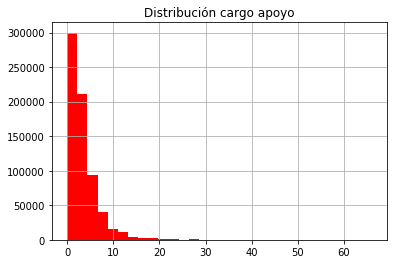

In [62]:
data['cargo_apoyo'].hist(bins=30, color='r');
plt.title('Distribución cargo apoyo')
plt.show()

Descartando valores mayores a 15...

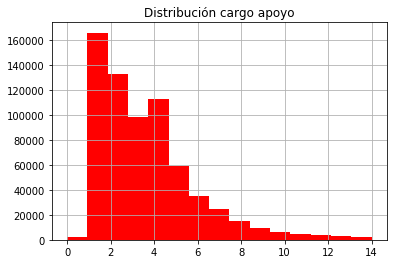

In [63]:
data[data.cargo_apoyo < 15]['cargo_apoyo'].hist(bins=15, color='r');
plt.title('Distribución cargo apoyo')
plt.show()

#### cargo direccion

In [64]:
pd.options.display.float_format = "{:.2f}".format
data.cargo_direccion.describe()

count   1071288.00
mean          3.42
std           1.88
min           0.00
25%           2.00
50%           3.00
75%           4.00
max          52.00
Name: cargo_direccion, dtype: float64

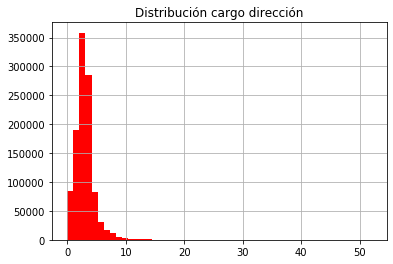

In [65]:
data['cargo_direccion'].hist(bins=50, color='r');
plt.title('Distribución cargo dirección')
plt.show()

Esta variable también tiene long tail. Tomamos valores menores a 15 para visualizar

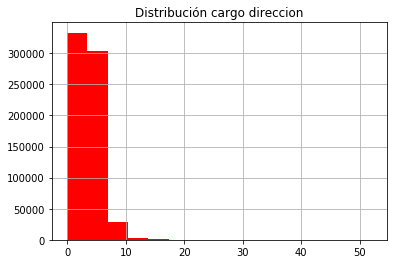

In [66]:
data[data.cargo_apoyo < 15]['cargo_direccion'].hist(bins=15, color='r');
plt.title('Distribución cargo direccion')
plt.show()

#### cargo frente a alumnos

In [67]:
pd.options.display.float_format = "{:.2f}".format
data.cargo_frente_a_alumnos.describe()

count   1091501.00
mean         23.32
std          12.99
min           0.00
25%          14.00
50%          21.00
75%          30.00
max         133.00
Name: cargo_frente_a_alumnos, dtype: float64

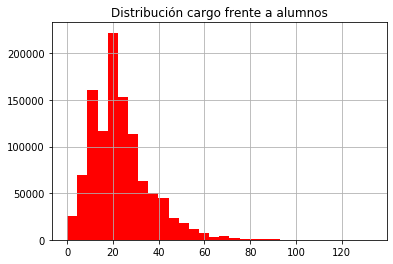

In [68]:
data['cargo_frente_a_alumnos'].hist(bins=30, color='r');
plt.title('Distribución cargo frente a alumnos')
plt.show()

Todas las variables de cargos en general tienen una istribución asimétrica positiva (a izquierda) con long-tail.

## Correlaciones

In [69]:
data.columns

Index(['sexo', 'indice_socioeconomico', 'nivel_desemp_lengua',
       'ponderador_lengua', 'repeticion_primaria', 'escuela_id', 'nivel_id',
       'year_id', 'escuela_ambito', 'escuela_gestion', 'escuela_icse',
       'escuela_icse_cat', 'escuela_indice_socioeconomico_medio',
       'escuela_indice_socioeconomico_medio_cat', 'escuela_tecnica',
       'escuela_tiene_internet', 'escuela_subvencion', 'escuela_dependencia',
       'provincia_id', 'departamento_tasa_con_nbi', 'cargo_direccion',
       'cargo_frente_a_alumnos', 'cargo_apoyo', 'cant_alumnos_curso',
       'gasto_inicial_primaria'],
      dtype='object')

Seleccionamos las columnas que mas nos interesa trabajar en un principio

In [70]:
analysis_col = ['sexo', 'indice_socioeconomico', 'nivel_desemp_lengua','repeticion_primaria',
                'escuela_ambito', 'escuela_gestion', 'escuela_icse','escuela_indice_socioeconomico_medio',
                'escuela_tecnica','escuela_tiene_internet', 'escuela_subvencion', 'escuela_dependencia',
                'departamento_tasa_con_nbi','cargo_apoyo', 'cargo_direccion',
                'cargo_frente_a_alumnos', 'cant_alumnos_curso','gasto_inicial_primaria'
               ]
data_analysis = data[analysis_col]
data_analysis.head()

,sexo,indice_socioeconomico,nivel_desemp_lengua,repeticion_primaria,escuela_ambito,escuela_gestion,escuela_icse,escuela_indice_socioeconomico_medio,escuela_tecnica,escuela_tiene_internet,escuela_subvencion,escuela_dependencia,departamento_tasa_con_nbi,cargo_apoyo,cargo_direccion,cargo_frente_a_alumnos,cant_alumnos_curso,gasto_inicial_primaria
0,f,medio,avanzado,no,urbano,privada,-1.00,2.22,f,t,Subvención Total,provincial,0.04,2.00,3.00,14.00,1107.00,9998134731.00
1,f,medio,basico,no,urbano,estatal,0.31,1.80,f,t,No corresponde,provincial,0.11,4.00,3.00,27.00,474.00,9998134731.00
2,nc,nc,satisfactorio,nc,urbano,privada,-1.00,2.17,f,t,Subvención Total,provincial,0.13,2.00,3.00,14.00,721.00,9998134731.00
3,f,nc,satisfactorio,no,urbano,privada,-1.00,2.39,f,t,Subvención Total,provincial,0.02,nan,3.00,30.00,846.00,9998134731.00
4,nc,alto,avanzado,no,urbano,estatal,0.04,2.39,f,t,No corresponde,provincial,0.02,nan,5.00,58.00,656.00,9998134731.00


#### Dropna

In [71]:
data_analysis = data_analysis.dropna()

#### Filtros

In [72]:
data_analysis = data_analysis[data_analysis.indice_socioeconomico != 'nc']
data_analysis = data_analysis[data_analysis.sexo != 'nc']
data_analysis = data_analysis[data_analysis.repeticion_primaria != 'nc']
data_analysis = data_analysis[data_analysis.nivel_desemp_lengua != 'nc']
data_analysis = data_analysis[data_analysis.escuela_icse != -1]
data_analysis = data_analysis[data_analysis.departamento_tasa_con_nbi != -1]
data_analysis = data_analysis[data_analysis.escuela_indice_socioeconomico_medio != -1]

data_analysis.shape[0]

104153

## Paso 1.7: Correlaciones entre Variables

En una primera etapa, decidimos asignar valores numéricos y sin aplicar ponderadores para tener una primera impresión de las correlaciones que hay entre algunas variables.

Esto no es metodológicmente correcto para predecir ya que asume categorías que varían en magnitudes crecientes y constantes, pero nos sirve para una primera impresión y ver las principales tendencias.

#### maps

In [73]:
desemp_map = {
    'nc': np.nan,
    'por_debajo_del_basico':1,
    'basico':2,
    'satisfactorio':3,
    'avanzado':4
}
ie_map = {
    'bajo':1,
    'medio':2,
    'alto':3
}
data_analysis['nivel_desemp_lengua'] = data_analysis.nivel_desemp_lengua.map(desemp_map)
data_analysis['indice_socioeconomico'] = data_analysis.indice_socioeconomico.map(ie_map)

In [74]:
repite_map = {
    'no': 0,
    'una_vez':1,
    'dos_veces':2,
    'tres_veces_o_mas':3
}
escuela_dependencia_map = {
    'provincial':0,
    'municipal':1,
    'nacional':2
}
data_analysis['repeticion_primaria'] = data_analysis.repeticion_primaria.map(repite_map)
data_analysis['escuela_dependencia'] = data_analysis.escuela_dependencia.map(escuela_dependencia_map)

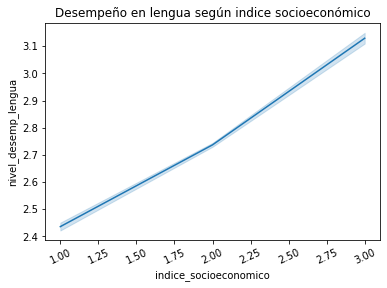

In [75]:
sns.lineplot(x="indice_socioeconomico", y="nivel_desemp_lengua",estimator='mean', data=data_analysis)
plt.title('Desempeño en lengua según indice socioeconómico')
plt.xticks(rotation=25)
plt.show()

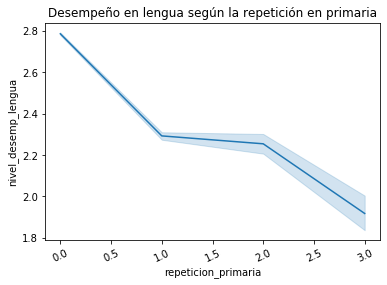

In [76]:
sns.lineplot(x="repeticion_primaria", y="nivel_desemp_lengua",estimator='mean', data=data_analysis)
plt.title('Desempeño en lengua según la repetición en primaria')
plt.xticks(rotation=25)
plt.show()

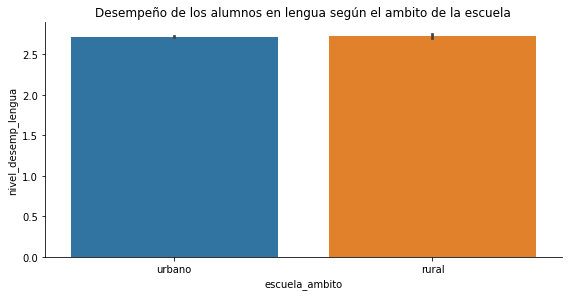

In [77]:
sns.catplot(x="escuela_ambito", y="nivel_desemp_lengua", kind="bar", data=data_analysis, height=4, aspect=2, legend=False)
plt.title('Desempeño de los alumnos en lengua según el ambito de la escuela')
plt.show()

El ambito no parece ser una variable que influya en el desempeño.

#### Heatmap

In [78]:
escuela_gestion_map = {
    'estatal':0,
    'privada':1
}
escuela_ambito_map = {
    'urbano':0,
    'rural':1
}
data_analysis['escuela_gestion'] = data_analysis.escuela_gestion.map(escuela_gestion_map)
data_analysis['escuela_ambito'] = data_analysis.escuela_ambito.map(escuela_ambito_map)

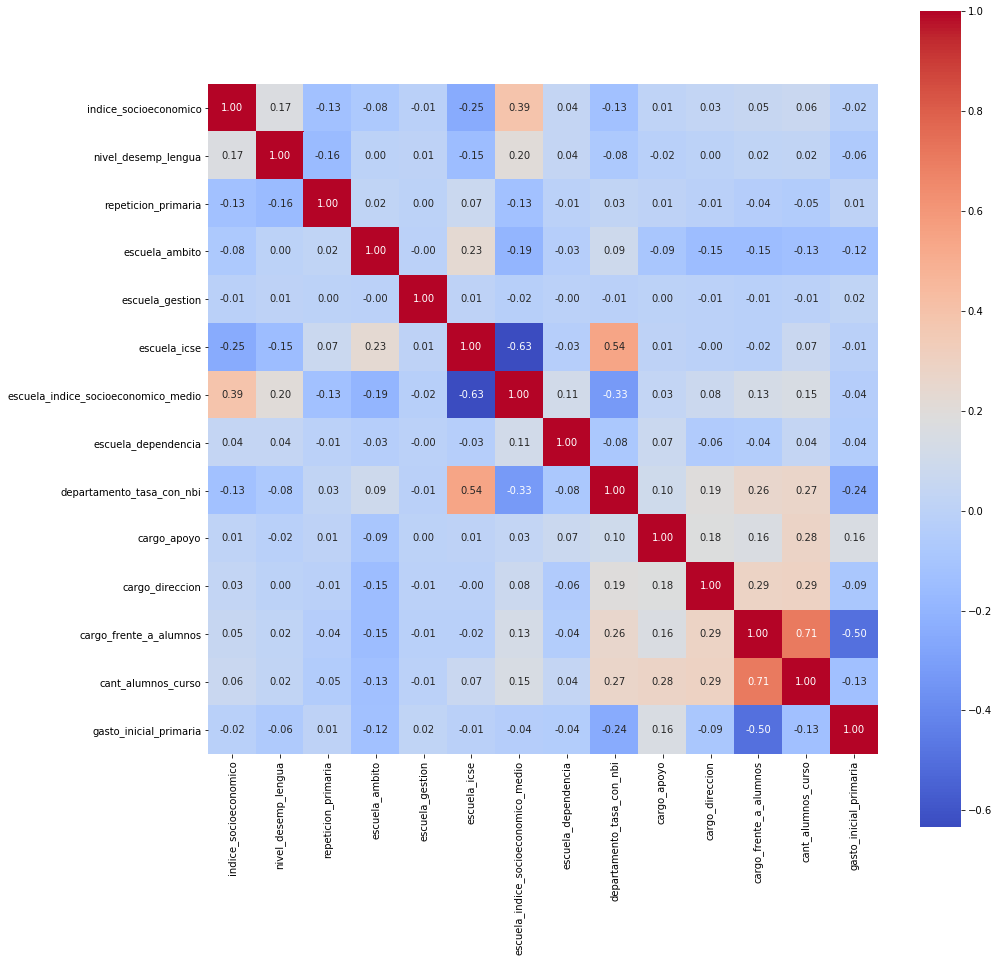

In [79]:
plt.figure(figsize=(15, 15))
sns.heatmap(data_analysis.corr(), square=True, annot=True, fmt='.2f', cmap='coolwarm')

### Análisis de correlación con variables dummy

Obtenemos primero que nada los cargos cubiertos por cantidad de alumnos en cada curso.

In [80]:
data_corr_analysis = data.drop(['escuela_id', 'year_id'], axis=1)
data_corr_analysis['cargo_apoyo_por_alumno'] = data_corr_analysis['cargo_apoyo'] / data_corr_analysis['cant_alumnos_curso']
data_corr_analysis['cargo_direccion_por_alumno'] = data_corr_analysis['cargo_direccion'] / data_corr_analysis['cant_alumnos_curso']
data_corr_analysis['cargo_frente_por_alumno'] = data_corr_analysis['cargo_frente_a_alumnos'] / data_corr_analysis['cant_alumnos_curso']
data_corr_analysis = data_corr_analysis.drop(['cargo_apoyo','cargo_direccion','cargo_frente_a_alumnos'], axis=1)

Dummies:

In [81]:
categorical = [col for col in data_corr_analysis.columns if (data_corr_analysis[col].dtypes == 'object')]
dummies = pd.get_dummies(data_corr_analysis[categorical], drop_first=False)

In [82]:
data_corr_analysis = pd.concat([data_corr_analysis, dummies], axis=1).drop(categorical, axis=1)
data_corr_analysis.head()

,ponderador_lengua,nivel_id,escuela_icse,escuela_indice_socioeconomico_medio,provincia_id,departamento_tasa_con_nbi,cant_alumnos_curso,gasto_inicial_primaria,cargo_apoyo_por_alumno,cargo_direccion_por_alumno,...,escuela_subvencion_Más de 50% y hasta 75%,escuela_subvencion_Más de 75% y hasta 99%,escuela_subvencion_No,escuela_subvencion_No corresponde,escuela_subvencion_Sin información,escuela_subvencion_Subvención Total,escuela_dependencia_municipal,escuela_dependencia_nacional,escuela_dependencia_provincial,escuela_dependencia_sin información
0,1.31,2,-1.00,2.22,4,0.04,1107.00,9998134731.00,0.00,0.00,...,0,0,0,0,0,1,0,0,1,0
1,3.47,2,0.31,1.80,4,0.11,474.00,9998134731.00,0.01,0.01,...,0,0,0,1,0,0,0,0,1,0
2,1.42,2,-1.00,2.17,4,0.13,721.00,9998134731.00,0.00,0.00,...,0,0,0,0,0,1,0,0,1,0
3,1.08,2,-1.00,2.39,4,0.02,846.00,9998134731.00,nan,0.00,...,0,0,0,0,0,1,0,0,1,0
4,1.70,2,0.04,2.39,4,0.02,656.00,9998134731.00,nan,0.01,...,0,0,0,1,0,0,0,0,1,0


#### Aplicamos ponderador a nivel de desempeño

In [83]:
target_col_names = ['nivel_desemp_lengua_avanzado',
                   'nivel_desemp_lengua_basico', 'nivel_desemp_lengua_nc',
                   'nivel_desemp_lengua_por_debajo_del_basico',
                   'nivel_desemp_lengua_satisfactorio']

In [84]:
pond_target = data_corr_analysis[target_col_names].values * data_corr_analysis[['ponderador_lengua']].values
pond_target[:3]

array([[1.3094671, 0.       , 0.       , 0.       , 0.       ],
       [0.       , 3.4705889, 0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       , 1.4192985]])

In [85]:
pond_target_df = pd.DataFrame(pond_target, columns=target_col_names)
pond_target_df.head(3)

,nivel_desemp_lengua_avanzado,nivel_desemp_lengua_basico,nivel_desemp_lengua_nc,nivel_desemp_lengua_por_debajo_del_basico,nivel_desemp_lengua_satisfactorio
0,1.31,0.00,0.00,0.00,0.00
1,0.00,3.47,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,1.42


In [86]:
data_corr_analysis[target_col_names] =  pond_target_df
data_corr_analysis = data_corr_analysis.drop('ponderador_lengua', axis=1)
data_corr_analysis.head(3)

,nivel_id,escuela_icse,escuela_indice_socioeconomico_medio,provincia_id,departamento_tasa_con_nbi,cant_alumnos_curso,gasto_inicial_primaria,cargo_apoyo_por_alumno,cargo_direccion_por_alumno,cargo_frente_por_alumno,...,escuela_subvencion_Más de 50% y hasta 75%,escuela_subvencion_Más de 75% y hasta 99%,escuela_subvencion_No,escuela_subvencion_No corresponde,escuela_subvencion_Sin información,escuela_subvencion_Subvención Total,escuela_dependencia_municipal,escuela_dependencia_nacional,escuela_dependencia_provincial,escuela_dependencia_sin información
0,2,-1.00,2.22,4,0.04,1107.00,9998134731.00,0.00,0.00,0.01,...,0,0,0,0,0,1,0,0,1,0
1,2,0.31,1.80,4,0.11,474.00,9998134731.00,0.01,0.01,0.06,...,0,0,0,1,0,0,0,0,1,0
2,2,-1.00,2.17,4,0.13,721.00,9998134731.00,0.00,0.00,0.02,...,0,0,0,0,0,1,0,0,1,0


#### Heatmaps

In [87]:
heatmap_cols = ['escuela_icse', 'escuela_indice_socioeconomico_medio','departamento_tasa_con_nbi','gasto_inicial_primaria',
                        'cargo_apoyo_por_alumno','cargo_direccion_por_alumno', 'cargo_frente_por_alumno', 'sexo_f',
                        'sexo_m', 'sexo_nc', 'indice_socioeconomico_alto','indice_socioeconomico_bajo', 'indice_socioeconomico_medio',
                        'indice_socioeconomico_nc','repeticion_primaria_dos_veces','repeticion_primaria_nc', 'repeticion_primaria_no',
                        'repeticion_primaria_tres_veces_o_mas', 'repeticion_primaria_una_vez','escuela_ambito_rural', 
                        'escuela_ambito_urbano','escuela_gestion_estatal', 'escuela_gestion_privada',
                        'escuela_gestion_social/cooperativa', 'escuela_icse_cat_alto','escuela_icse_cat_bajo_y_medio', 
                        'escuela_icse_cat_critico','escuela_indice_socioeconomico_medio_cat_tercil_alto',
                        'escuela_indice_socioeconomico_medio_cat_tercil_bajo','escuela_indice_socioeconomico_medio_cat_tercil_medio',
                        'escuela_tecnica_f', 'escuela_tecnica_t', 'escuela_tiene_internet_f','escuela_tiene_internet_t',
                        'escuela_subvencion_Hasta 25%','escuela_subvencion_Más de 25% y hasta 50%',
                        'escuela_subvencion_Más de 50% y hasta 75%','escuela_subvencion_Más de 75% y hasta 99%', 'escuela_subvencion_No',
                        'escuela_subvencion_No corresponde','escuela_subvencion_Sin información','escuela_subvencion_Subvención Total',
                        'escuela_dependencia_municipal','escuela_dependencia_nacional', 'escuela_dependencia_provincial',
                        'escuela_dependencia_sin información', 'nivel_desemp_lengua_avanzado','nivel_desemp_lengua_basico', 
                        'nivel_desemp_lengua_por_debajo_del_basico','nivel_desemp_lengua_satisfactorio',
                       ]
target_col_names.remove('nivel_desemp_lengua_nc')
data_corr = data_corr_analysis[heatmap_cols].corr() #correlación entre todas las variables seleccionadas

corr_lengua = data_corr_analysis[heatmap_cols].corr()[target_col_names][:] #corr variables seleccionadas con targets
corr_lengua_df = pd.DataFrame(corr_lengua)

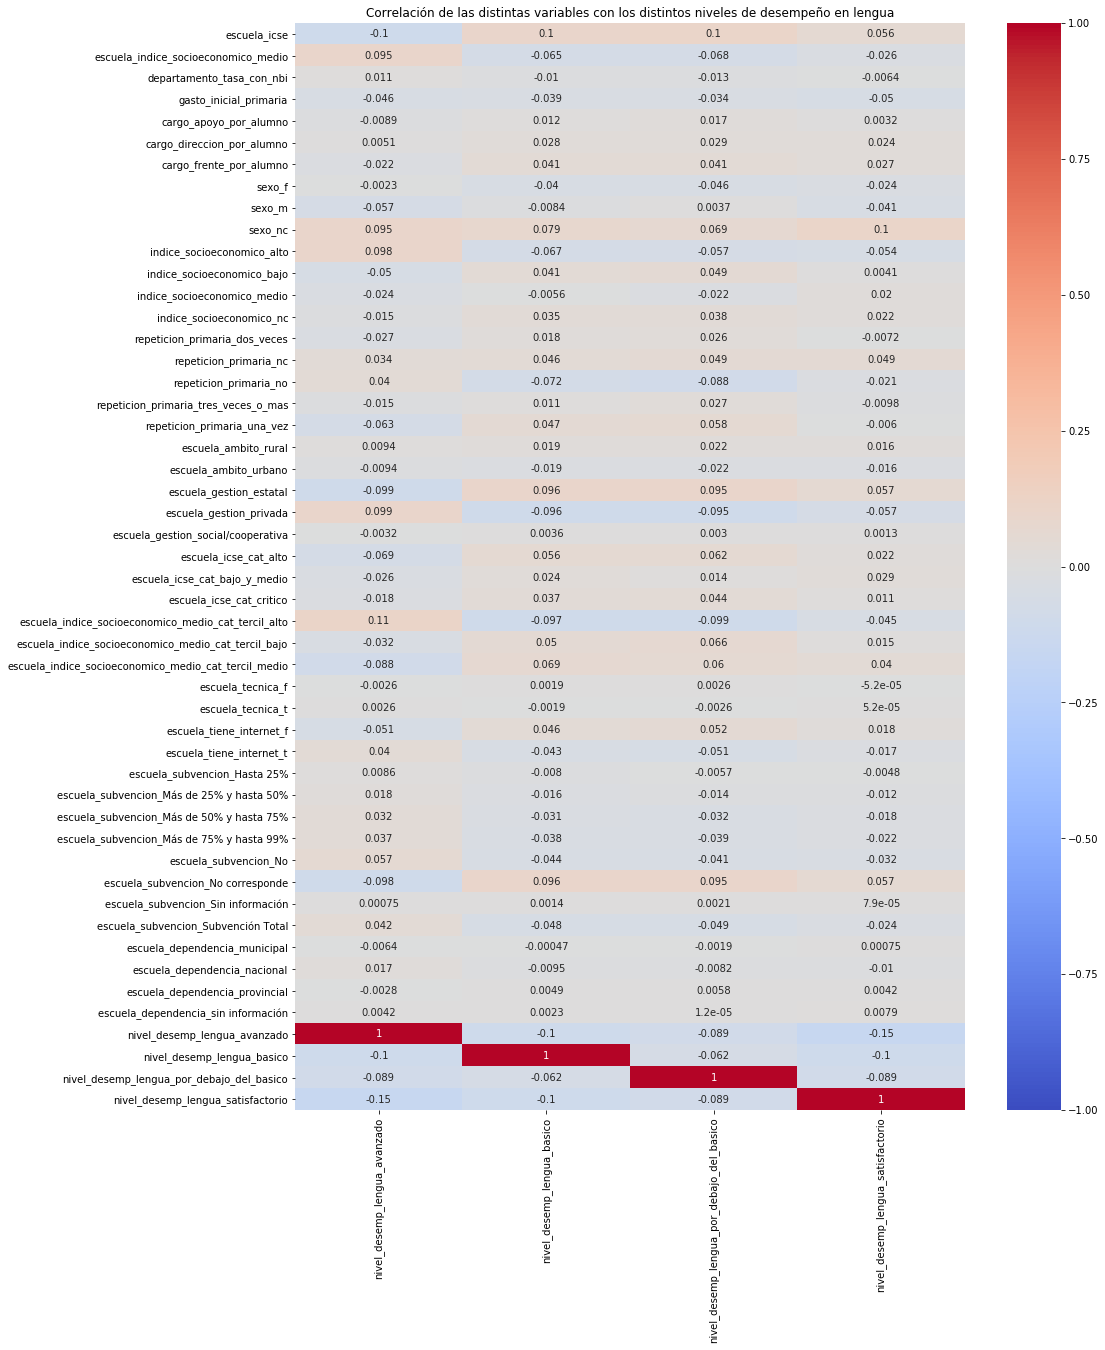

In [88]:
fig, ax = plt.subplots(figsize=(15, 20))
sns.heatmap(corr_lengua, cmap='coolwarm', annot=True, vmin=-1)
plt.title('Correlación de las distintas variables con los distintos niveles de desempeño en lengua')
plt.show()

#### Correlación entre variables escuela

In [89]:
escuela_cols = ['escuela_ambito_rural', 'escuela_ambito_urbano',
       'escuela_gestion_estatal', 'escuela_gestion_privada',
       'escuela_gestion_social/cooperativa', 'escuela_icse_cat_alto',
       'escuela_icse_cat_bajo_y_medio', 'escuela_icse_cat_critico',
       'escuela_indice_socioeconomico_medio_cat_tercil_alto',
       'escuela_indice_socioeconomico_medio_cat_tercil_bajo',
       'escuela_indice_socioeconomico_medio_cat_tercil_medio',
       'escuela_tecnica_f', 'escuela_tecnica_t', 'escuela_tiene_internet_f',
       'escuela_tiene_internet_t', 'escuela_subvencion_Hasta 25%',
       'escuela_subvencion_Más de 25% y hasta 50%',
       'escuela_subvencion_Más de 50% y hasta 75%',
       'escuela_subvencion_Más de 75% y hasta 99%', 'escuela_subvencion_No',
       'escuela_subvencion_No corresponde',
       'escuela_subvencion_Sin información',
       'escuela_subvencion_Subvención Total', 'escuela_dependencia_municipal',
       'escuela_dependencia_nacional', 'escuela_dependencia_provincial',
       'escuela_dependencia_sin información','escuela_icse', 'escuela_indice_socioeconomico_medio',]
escuela_corr = data_corr_analysis[escuela_cols].corr()

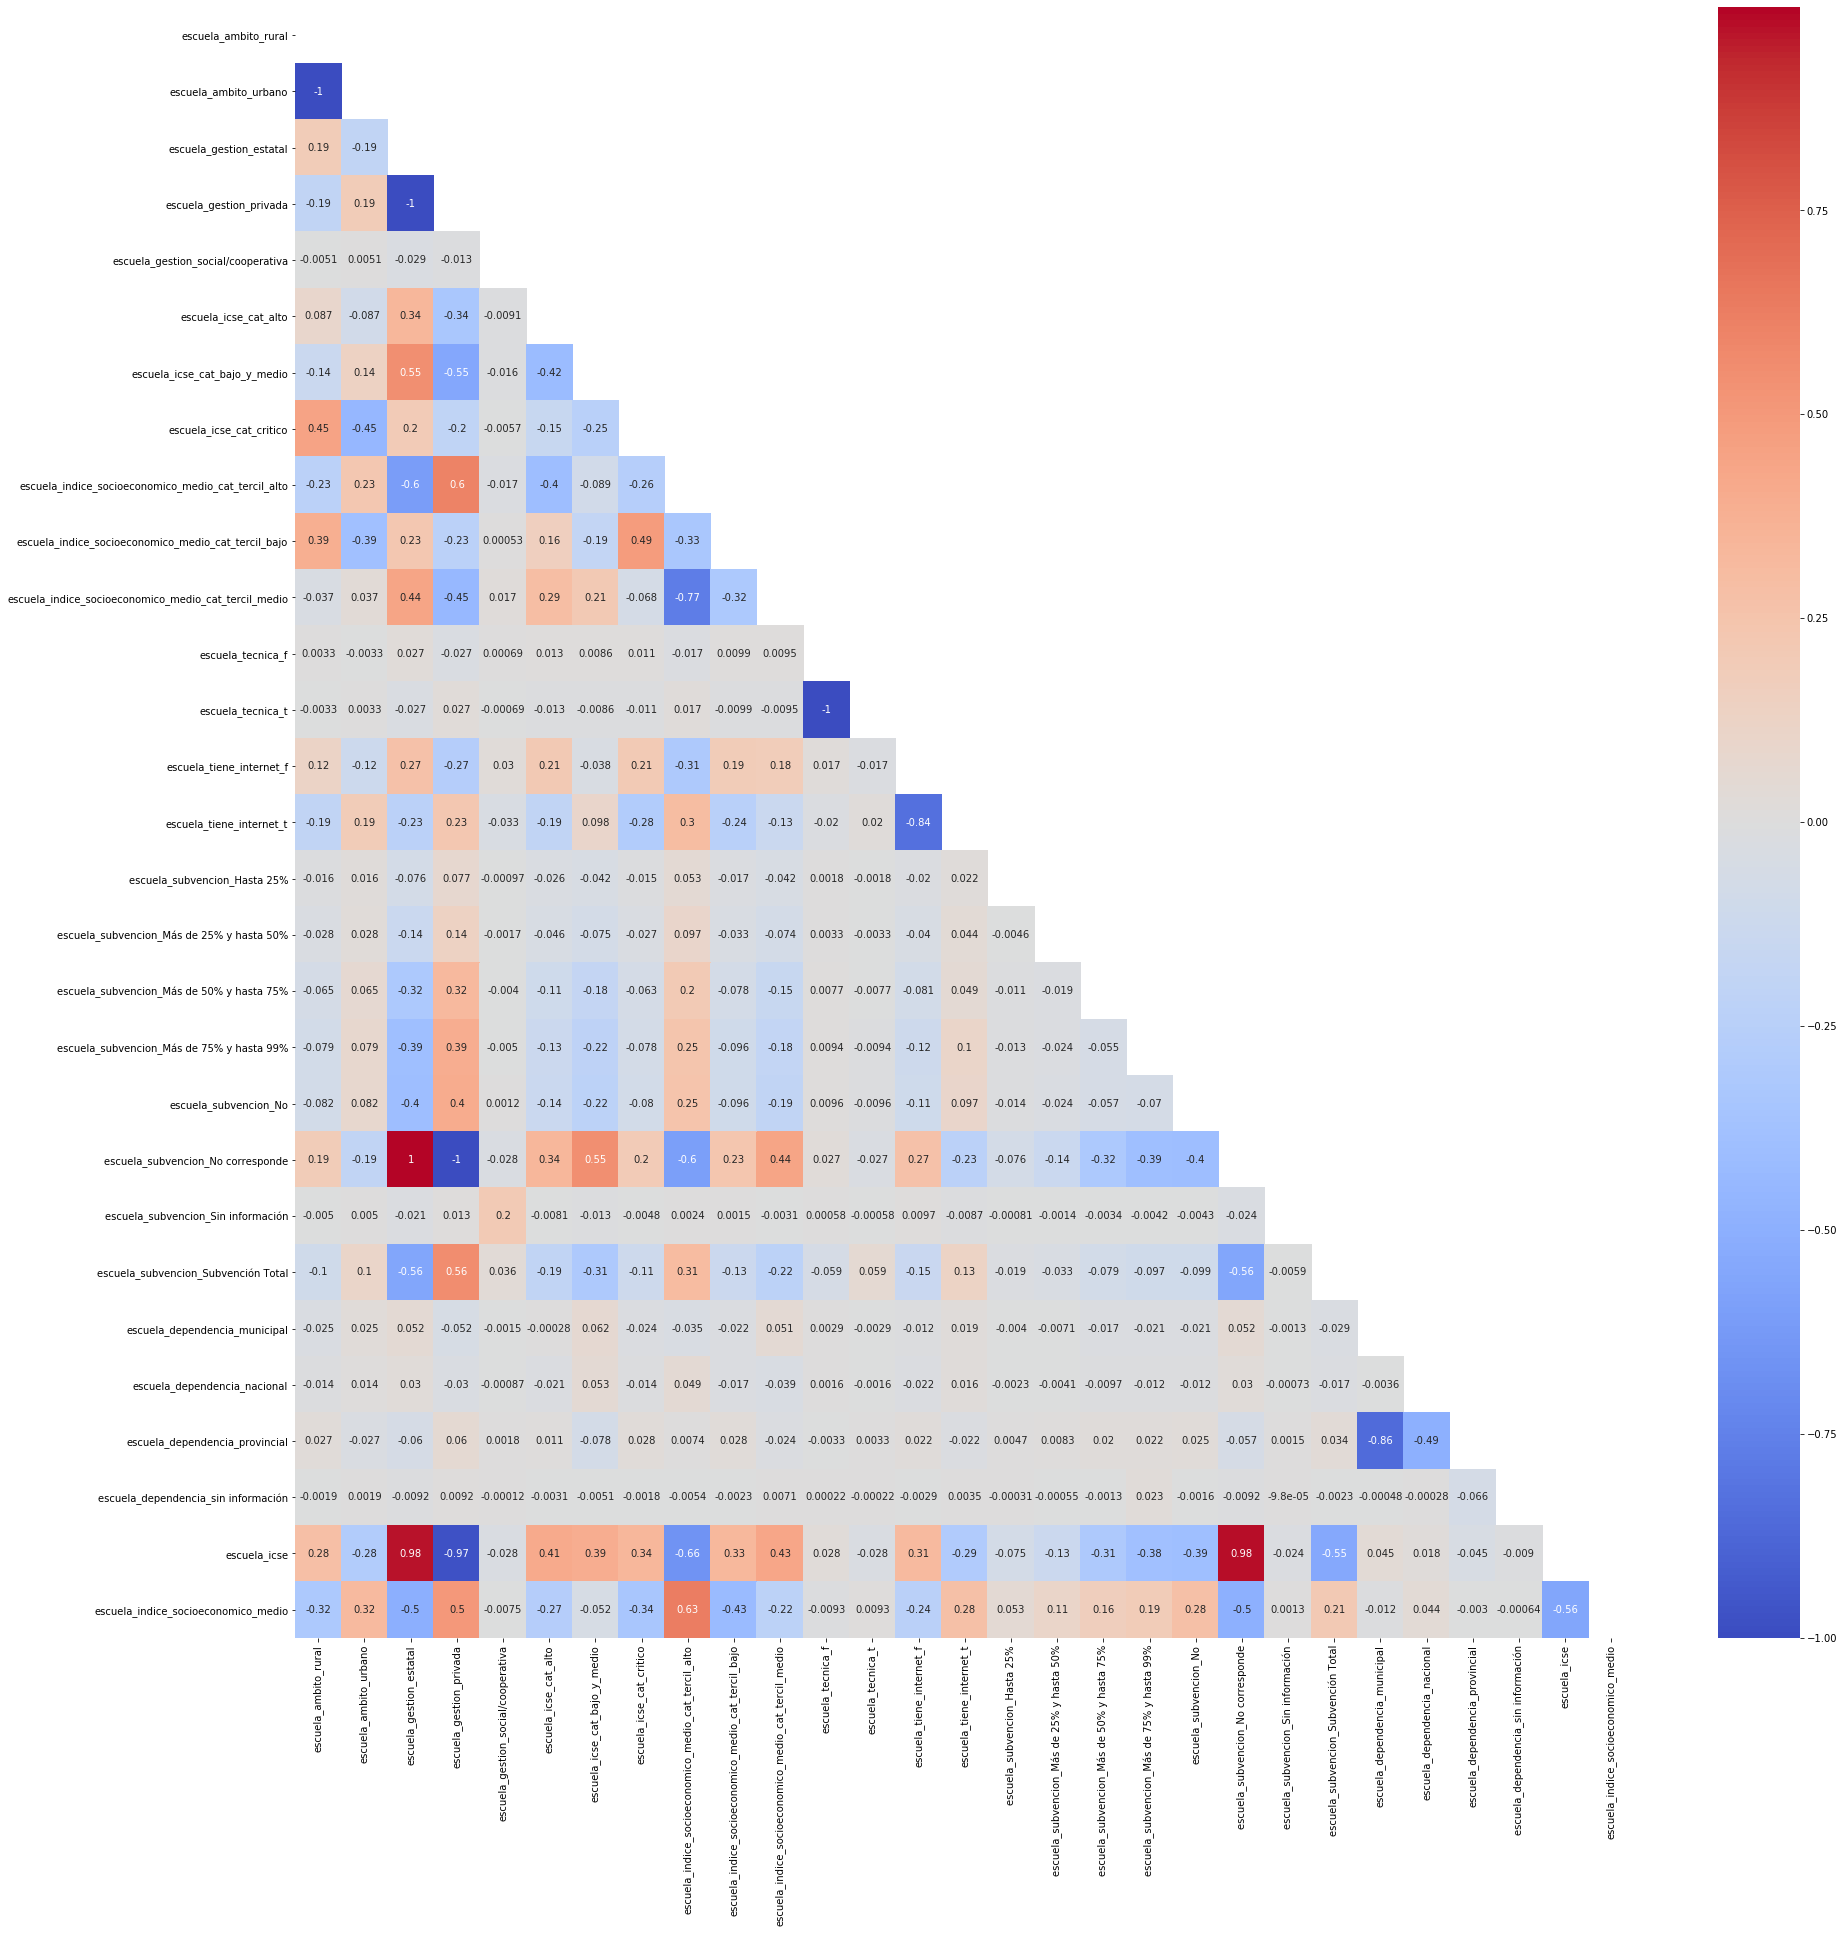

In [90]:
mask = np.zeros_like(escuela_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(30,30))
sns.heatmap(escuela_corr,
            vmin=-1,
            fmt='.2g',
            cmap='coolwarm',
            annot=True,
            mask = mask)

#### Correlación variables escuela con nivel de desempeño en lengua

In [91]:
escuela_cols += target_col_names
corr_escuela_lengua = data_corr_analysis[escuela_cols].corr()[target_col_names][:]

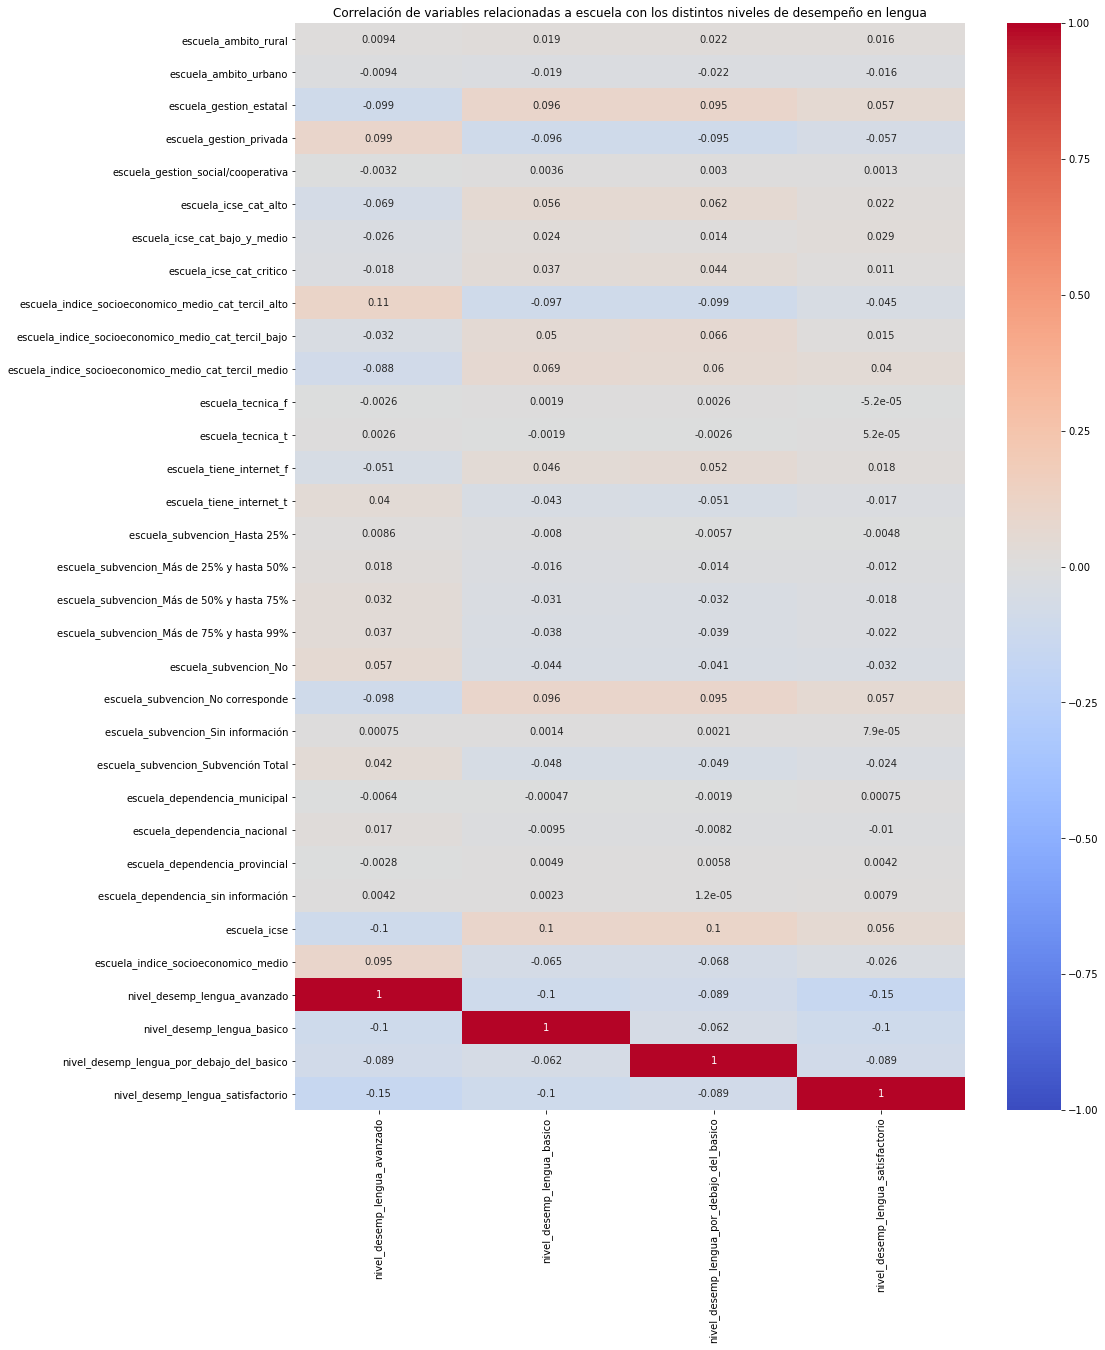

In [92]:
fig, ax = plt.subplots(figsize=(15, 20))
sns.heatmap(corr_escuela_lengua, cmap='coolwarm', annot=True, vmin=-1)
plt.title('Correlación de variables relacionadas a escuela con los distintos niveles de desempeño en lengua')
plt.show()

#### Correlación entre variables del alumno

In [93]:
alumno_cols = ['sexo_f','sexo_m', 'sexo_nc', 'indice_socioeconomico_alto',
       'indice_socioeconomico_bajo', 'indice_socioeconomico_medio',
       'indice_socioeconomico_nc', 'nivel_desemp_lengua_avanzado',
       'nivel_desemp_lengua_basico','nivel_desemp_lengua_por_debajo_del_basico',
       'nivel_desemp_lengua_satisfactorio', 'repeticion_primaria_dos_veces',
       'repeticion_primaria_nc', 'repeticion_primaria_no',
       'repeticion_primaria_tres_veces_o_mas', 'repeticion_primaria_una_vez']
alumno_corr = data_corr_analysis[alumno_cols].corr()

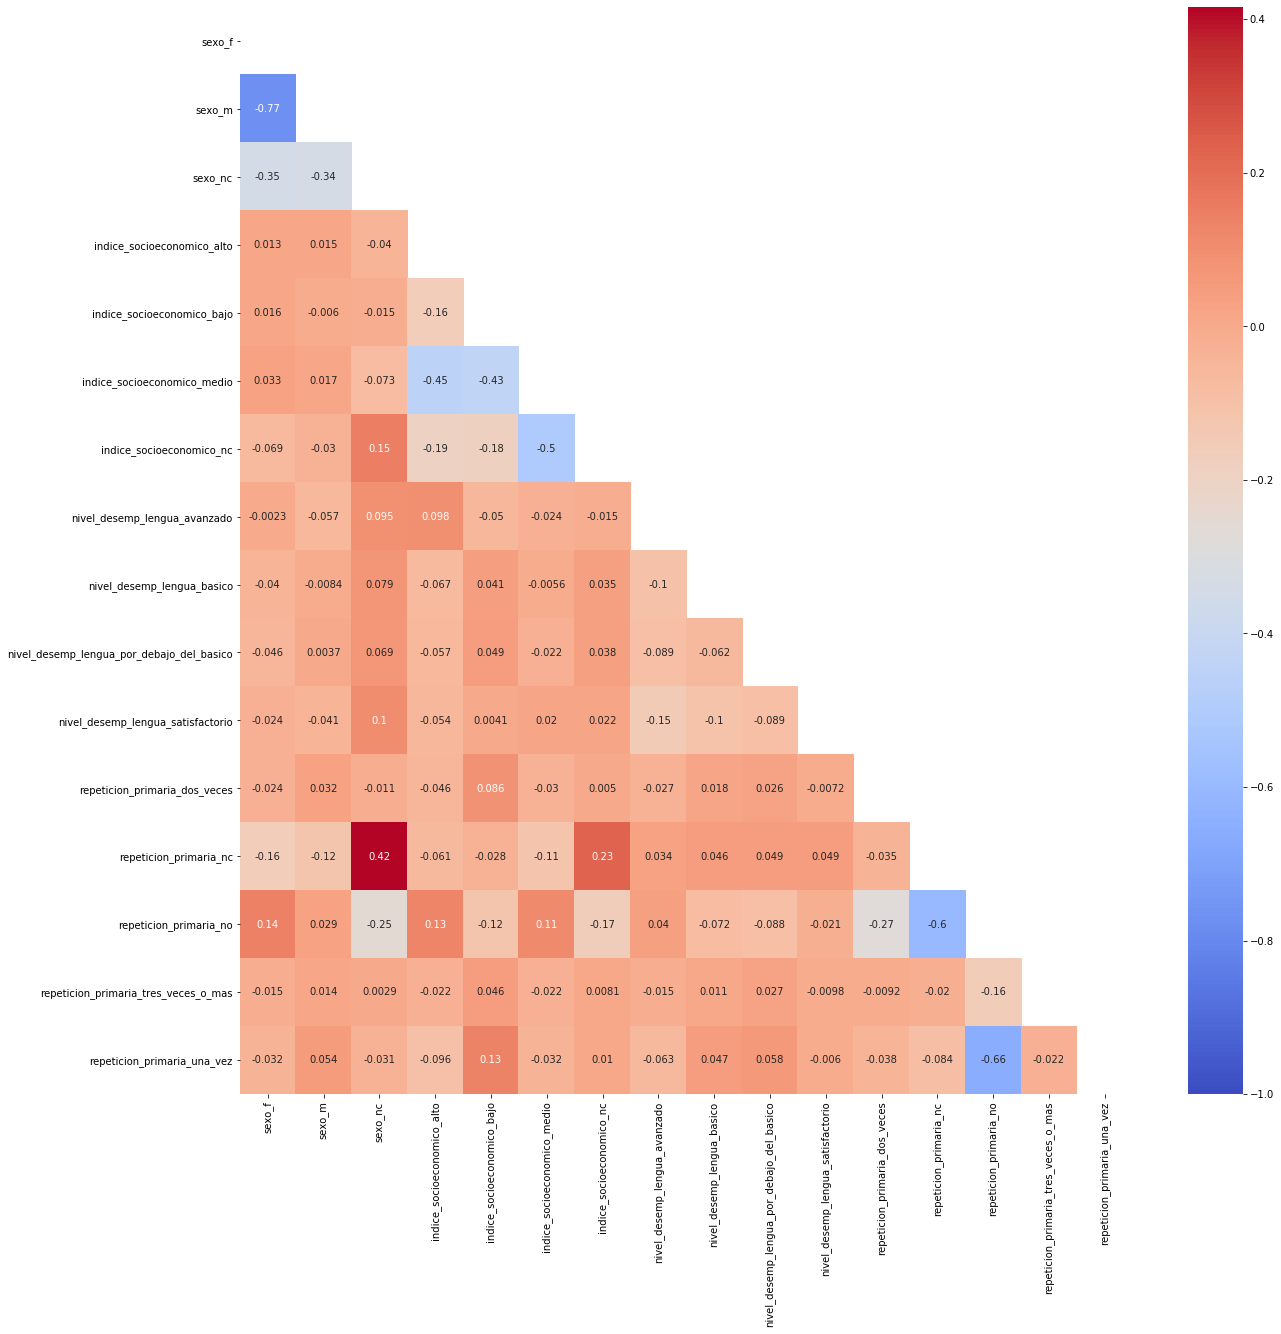

In [94]:
mask = np.zeros_like(alumno_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,20))
sns.heatmap(alumno_corr,
            vmin=-1,
            fmt='.2g',
            cmap='coolwarm',
            annot=True,
            mask = mask);

#### Correlación variables del alumno con nivel de desempeño en lengua

In [95]:
corr_alumno_lengua = data_corr_analysis[alumno_cols].corr()[target_col_names][:]

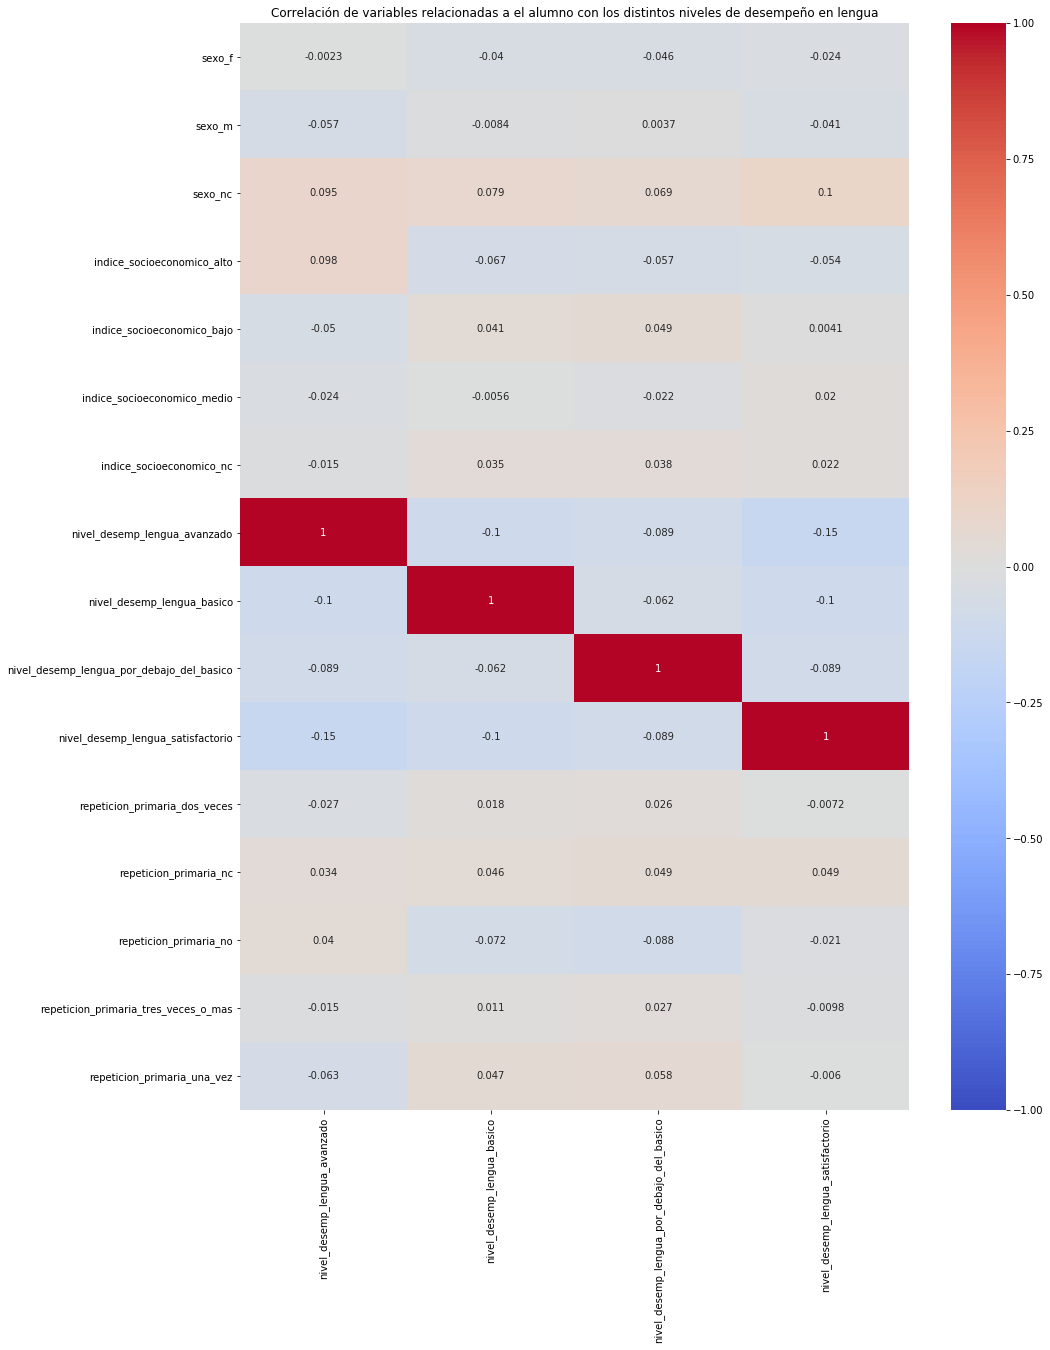

In [96]:
fig, ax = plt.subplots(figsize=(15, 20))
sns.heatmap(corr_alumno_lengua, cmap='coolwarm', annot=True, vmin=-1)
plt.title('Correlación de variables relacionadas a el alumno con los distintos niveles de desempeño en lengua')
plt.show()

#### Correlación de cargos por cantidad de alumnos con otras variables

In [97]:
cargos_cols = ['cargo_apoyo_por_alumno','cargo_direccion_por_alumno', 'cargo_frente_por_alumno',
              'escuela_icse', 'escuela_indice_socioeconomico_medio','nivel_desemp_lengua_avanzado',
               'nivel_desemp_lengua_basico','nivel_desemp_lengua_por_debajo_del_basico',
               'nivel_desemp_lengua_satisfactorio', 'repeticion_primaria_dos_veces',
               'repeticion_primaria_nc', 'repeticion_primaria_no',
               'repeticion_primaria_tres_veces_o_mas', 'repeticion_primaria_una_vez']
cargos_corr = data_corr_analysis[cargos_cols].corr()

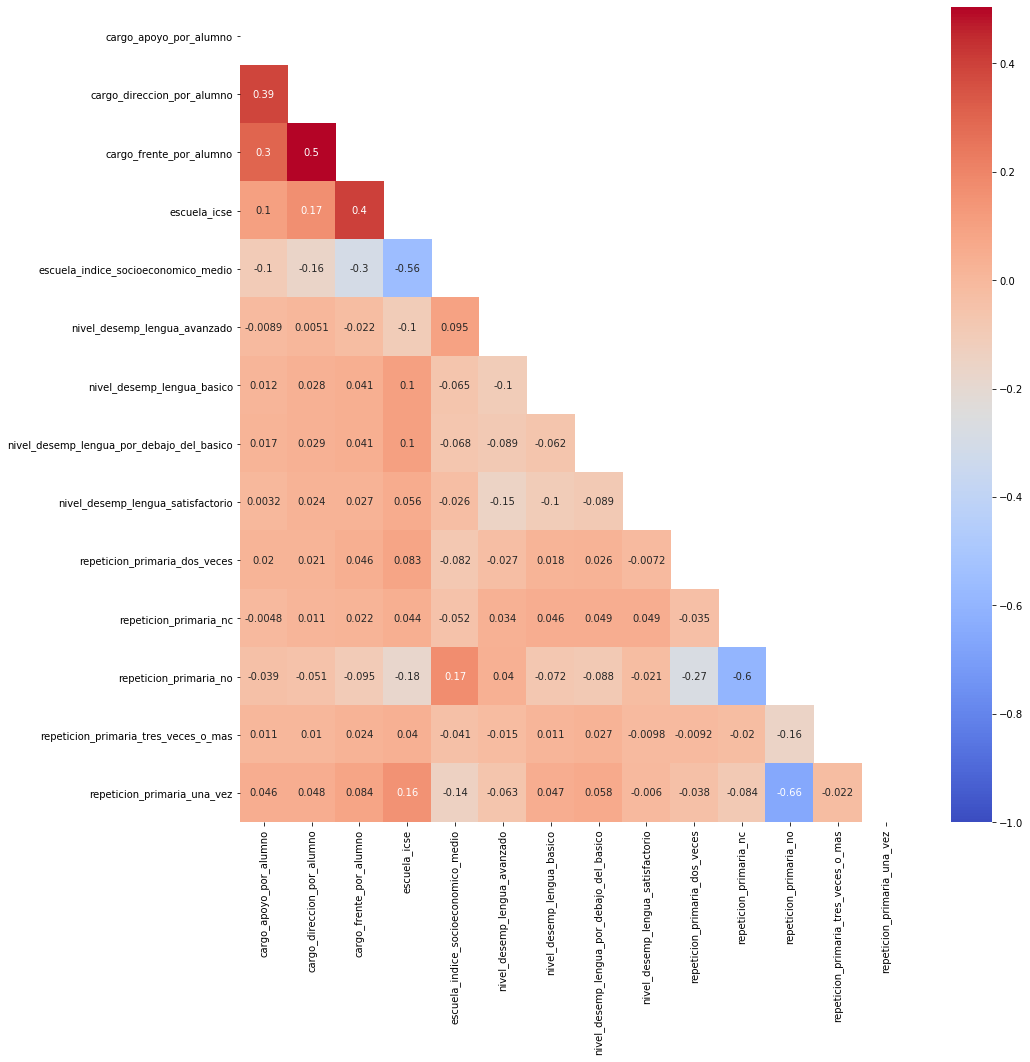

In [98]:
mask = np.zeros_like(cargos_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15,15))
sns.heatmap(cargos_corr,
            vmin=-1,
            fmt='.2g',
            cmap='coolwarm',
            annot=True,
            mask = mask);

## Paso 1.8: Preprocesamiento de los datos

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1101518 entries, 0 to 1101517
Data columns (total 25 columns):
 #   Column                                   Non-Null Count    Dtype  
---  ------                                   --------------    -----  
 0   sexo                                     1101518 non-null  object 
 1   indice_socioeconomico                    1101518 non-null  object 
 2   nivel_desemp_lengua                      561632 non-null   object 
 3   ponderador_lengua                        1037569 non-null  float64
 4   repeticion_primaria                      1101518 non-null  object 
 5   escuela_id                               1101518 non-null  int64  
 6   nivel_id                                 1101518 non-null  int64  
 7   year_id                                  1101518 non-null  int64  
 8   escuela_ambito                           1101518 non-null  object 
 9   escuela_gestion                          1101518 non-null  object 
 10  escuela_icse      

In [100]:
columnas_de_interes = ['indice_socioeconomico','nivel_desemp_lengua','ponderador_lengua',
                      'repeticion_primaria','escuela_ambito','escuela_gestion', 'escuela_icse',
                       'escuela_indice_socioeconomico_medio','escuela_tecnica','escuela_tiene_internet',
                       'escuela_subvencion','escuela_dependencia','departamento_tasa_con_nbi',
                       'cargo_direccion', 'cargo_frente_a_alumnos', 'cargo_apoyo', 'cant_alumnos_curso',
                       'gasto_inicial_primaria']

data_prep = data[columnas_de_interes] #Seleccionamos solo las columnas que nos interesan

filtro_desemp = data_prep['nivel_desemp_lengua'].isin(['satisfactorio','avanzado','basico','por_debajo_del_basico'])
filtro_icse = data_prep['escuela_icse'] > 0

data_prep = data_prep[(filtro_desemp) & (filtro_icse)]

In [101]:
data_prep.shape[0]

342241

De los 1.101.518 registros que teniamos al comienzo, nos quedan 342.241 al aplicar filtros

No tomamos la columna sexo por el momento ya que como vimos en el análisis exploratorio, tiene un porcentaje alto de faltantes

### Datos nulos

#### isna()

In [102]:
na = data_prep.isna().sum()
na = pd.DataFrame(na, columns=['null'])
na[na['null']>0]

,null
escuela_tiene_internet,19510
departamento_tasa_con_nbi,20
cargo_direccion,13362
cargo_frente_a_alumnos,3655
cargo_apoyo,119810
cant_alumnos_curso,261
gasto_inicial_primaria,11882


**escuela_tiene_internet**

In [103]:
data_prep['escuela_tiene_internet'].value_counts()

t    236527
f     86204
Name: escuela_tiene_internet, dtype: int64

In [104]:
data_prep['escuela_tiene_internet'] = data_prep['escuela_tiene_internet'].fillna('t')

Por ahora completamos con t para no descartar este dato. Podríamos tambien completarlo basandonos en alguna variable económica de la escuela

***departamento_tasa_con_nbi***

In [105]:
data_prep['departamento_tasa_con_nbi'].describe()

count   342221.00
mean        -0.18
std          0.48
min         -1.00
25%         -1.00
50%          0.06
75%          0.11
max          0.40
Name: departamento_tasa_con_nbi, dtype: float64

In [106]:
data_prep[data_prep['departamento_tasa_con_nbi'] == -1].shape[0]

86782

Esta columna tiene demasiados nulos por lo que decidimos descartarla por el momento para este primer análisis. La incluimos en un próximo análisis completando los nulos para ver como influye.

In [107]:
data_prep = data_prep.drop('departamento_tasa_con_nbi', axis=1)

***cargo_direccion***

In [108]:
data_prep['cargo_direccion'].describe()

count   328879.00
mean         3.52
std          2.29
min          0.00
25%          2.00
50%          3.00
75%          4.00
max         52.00
Name: cargo_direccion, dtype: float64

In [109]:
data_prep['cargo_direccion'] = data_prep['cargo_direccion'].fillna(3)

Completamos en este caso para cargo_direccion con el valor del cuartil 2 (3).

***cargo_frente_a_alumnos***

In [110]:
data_prep['cargo_frente_a_alumnos'].describe()

count   338586.00
mean        24.92
std         13.58
min          0.00
25%         16.00
50%         23.00
75%         32.00
max        108.00
Name: cargo_frente_a_alumnos, dtype: float64

In [111]:
data_prep['cargo_frente_a_alumnos'] = data_prep['cargo_frente_a_alumnos'].fillna(23)

También completamos con el valor del cuartil 2 (23)

***cargo_apoyo***

In [112]:
data_prep['cargo_apoyo'].describe()

count   222431.00
mean         3.68
std          3.26
min          0.00
25%          2.00
50%          3.00
75%          5.00
max         65.00
Name: cargo_apoyo, dtype: float64

In [113]:
data_prep['cargo_apoyo'] = data_prep['cargo_apoyo'].fillna(3)

Tambien completamos con valor del cuartil 2 (3)

***cant_alumnos_curso***

In [114]:
data_prep['cant_alumnos_curso'].describe()

count   341980.00
mean       494.59
std        348.77
min          1.00
25%        279.00
50%        450.00
75%        633.25
max       4022.00
Name: cant_alumnos_curso, dtype: float64

In [115]:
data_prep['cant_alumnos_curso'] = data_prep['cant_alumnos_curso'].fillna(450)

También completamos con la mediana.

***gasto_inicial_primaria***

In [116]:
data_prep['gasto_inicial_primaria'].describe()

count        330359.00
mean    16914376852.45
std     16115054041.24
min      1193766949.00
25%      4764915887.00
50%      9683129447.00
75%     40563029196.00
max     40563029196.00
Name: gasto_inicial_primaria, dtype: float64

In [117]:
data_prep['gasto_inicial_primaria'] = data_prep['gasto_inicial_primaria'].fillna(16914376852.45)

En este caso usamos la media para competar -> 16914376852.45

#### nc

In [118]:
miss = miss_data(data_prep, 'nc')
miss[miss.cantidad > 0]

,cantidad,porcentaje
variable,,
indice_socioeconomico,62605,18.29
repeticion_primaria,24794,7.24


***indice_socioeconomico***

In [119]:
data_prep['indice_socioeconomico'].value_counts()

medio    192041
bajo      62644
nc        62605
alto      24951
Name: indice_socioeconomico, dtype: int64

In [120]:
map_is = {'nc':'medio','medio':'medio','bajo':'bajo','alto':'alto'}
data_prep['indice_socioeconomico'] = data_prep['indice_socioeconomico'].map(map_is)

Completamos con el valor más frecuente

***repeticion_primaria***

In [121]:
data_prep['repeticion_primaria'].value_counts()

no                  270491
una_vez              37661
nc                   24794
dos_veces             7033
tres_veces_o_mas      2262
Name: repeticion_primaria, dtype: int64

In [122]:
map_rep = {'nc':'no', 'no':'no','una_vez':'una_vez','dos_veces':'dos_veces','tres_veces_o_mas':'tres_veces_o_mas'}
data_prep['repeticion_primaria'] = data_prep['repeticion_primaria'].map(map_rep)

Completamos con el valor más frecuente

#### No corresponde

In [123]:
miss = miss_data(data_prep, 'No corresponde')
miss[miss.cantidad > 0]

,cantidad,porcentaje
variable,,
escuela_subvencion,342241,100.00


***escuela_subvencion***

In [124]:
data_prep['escuela_subvencion'].value_counts()

No corresponde    342241
Name: escuela_subvencion, dtype: int64

En este caso, el valor es siempre 'No corresponde' por lo que descartamos la variable

In [125]:
data_prep = data_prep.drop('escuela_subvencion', axis=1)

#### -1

In [126]:
miss = miss_data(data_prep, -1)
miss[miss.cantidad > 0]

,cantidad,porcentaje
variable,,
escuela_indice_socioeconomico_medio,819,0.24


***escuela_indice_socioeconomico_medio***

In [127]:
data_prep['escuela_indice_socioeconomico_medio'].describe()

count   342241.00
mean         1.85
std          0.29
min         -1.00
25%          1.74
50%          1.88
75%          2.00
max          3.00
Name: escuela_indice_socioeconomico_medio, dtype: float64

In [128]:
data_prep.escuela_indice_socioeconomico_medio = data_prep.escuela_indice_socioeconomico_medio.replace(-1, 1.85)

En este caso completamos con la media

***Controlamos que no hayan quedado nulos***

In [129]:
data_prep.isna().sum()

indice_socioeconomico                  0
nivel_desemp_lengua                    0
ponderador_lengua                      0
repeticion_primaria                    0
escuela_ambito                         0
escuela_gestion                        0
escuela_icse                           0
escuela_indice_socioeconomico_medio    0
escuela_tecnica                        0
escuela_tiene_internet                 0
escuela_dependencia                    0
cargo_direccion                        0
cargo_frente_a_alumnos                 0
cargo_apoyo                            0
cant_alumnos_curso                     0
gasto_inicial_primaria                 0
dtype: int64

In [130]:
miss = miss_data(data_prep, 'nc')
miss[miss.cantidad > 0]

,cantidad,porcentaje
variable,,


In [131]:
miss = miss_data(data_prep, 'No corresponde')
miss[miss.cantidad > 0]

,cantidad,porcentaje
variable,,


In [132]:
miss = miss_data(data_prep, -1)
miss[miss.cantidad > 0]

,cantidad,porcentaje
variable,,


### Creación variables dummy

In [133]:
target_name = 'nivel_desemp_lengua'

In [134]:
categorical = [col for col in data_prep.columns if (data_prep[col].dtypes == 'object') & (col != target_name)]

In [135]:
dummies = pd.get_dummies(data_prep[categorical], drop_first=True)

In [136]:
data_prep = pd.concat([data_prep, dummies], axis=1).drop(categorical, axis=1)

In [137]:
data_prep.head()

,nivel_desemp_lengua,ponderador_lengua,escuela_icse,escuela_indice_socioeconomico_medio,cargo_direccion,cargo_frente_a_alumnos,cargo_apoyo,cant_alumnos_curso,gasto_inicial_primaria,indice_socioeconomico_bajo,...,repeticion_primaria_no,repeticion_primaria_tres_veces_o_mas,repeticion_primaria_una_vez,escuela_ambito_urbano,escuela_gestion_privada,escuela_gestion_social/cooperativa,escuela_tecnica_t,escuela_tiene_internet_t,escuela_dependencia_nacional,escuela_dependencia_provincial
1,basico,3.47,0.31,1.80,3.00,27.00,4.00,474.00,9998134731.00,0,...,1,0,0,1,0,0,0,1,0,1
4,avanzado,1.70,0.04,2.39,5.00,58.00,3.00,656.00,9998134731.00,0,...,1,0,0,1,0,0,0,1,0,1
5,satisfactorio,2.07,0.22,1.86,3.00,29.00,4.00,328.00,9998134731.00,0,...,1,0,0,1,0,0,0,1,0,1
6,satisfactorio,1.69,0.13,1.84,3.00,28.00,5.00,331.00,9998134731.00,0,...,1,0,0,1,0,0,0,1,0,1
12,satisfactorio,3.15,0.09,2.00,3.00,15.00,2.00,184.00,9998134731.00,0,...,1,0,0,1,0,0,0,1,0,1


**Ahora dummies del target sin usar drop_first=True**

In [138]:
target_dummies = pd.get_dummies(data_prep[target_name], drop_first=False)

In [139]:
data_prep = pd.concat([data_prep, target_dummies], axis=1).drop(target_name, axis=1)

In [140]:
data_prep.head(3)

,ponderador_lengua,escuela_icse,escuela_indice_socioeconomico_medio,cargo_direccion,cargo_frente_a_alumnos,cargo_apoyo,cant_alumnos_curso,gasto_inicial_primaria,indice_socioeconomico_bajo,indice_socioeconomico_medio,...,escuela_gestion_privada,escuela_gestion_social/cooperativa,escuela_tecnica_t,escuela_tiene_internet_t,escuela_dependencia_nacional,escuela_dependencia_provincial,avanzado,basico,por_debajo_del_basico,satisfactorio
1,3.47,0.31,1.80,3.00,27.00,4.00,474.00,9998134731.00,0,1,...,0,0,0,1,0,1,0,1,0,0
4,1.70,0.04,2.39,5.00,58.00,3.00,656.00,9998134731.00,0,0,...,0,0,0,1,0,1,1,0,0,0
5,2.07,0.22,1.86,3.00,29.00,4.00,328.00,9998134731.00,0,1,...,0,0,0,1,0,1,0,0,0,1


### Aplicamos ponderador

In [141]:
pond_target = data_prep[target_dummies.columns].values * np.transpose(np.array([data_prep['ponderador_lengua'].values,]*4))
pond_target[:3]

array([[0.       , 3.4705889, 0.       , 0.       ],
       [1.7044344, 0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 2.0718536]])

In [142]:
pond_target_df = pd.DataFrame(pond_target, columns=target_dummies.columns)
pond_target_df.head(3)

,avanzado,basico,por_debajo_del_basico,satisfactorio
0,0.00,3.47,0.00,0.00
1,1.70,0.00,0.00,0.00
2,0.00,0.00,0.00,2.07


In [143]:
data_prep = data_prep.reset_index(drop=True)

In [144]:
target_column_names = pond_target_df.columns
data_prep[target_column_names] =  pond_target_df
data_prep = data_prep.drop('ponderador_lengua', axis=1)
data_prep.head(3)

,escuela_icse,escuela_indice_socioeconomico_medio,cargo_direccion,cargo_frente_a_alumnos,cargo_apoyo,cant_alumnos_curso,gasto_inicial_primaria,indice_socioeconomico_bajo,indice_socioeconomico_medio,repeticion_primaria_no,...,escuela_gestion_privada,escuela_gestion_social/cooperativa,escuela_tecnica_t,escuela_tiene_internet_t,escuela_dependencia_nacional,escuela_dependencia_provincial,avanzado,basico,por_debajo_del_basico,satisfactorio
0,0.31,1.80,3.00,27.00,4.00,474.00,9998134731.00,0,1,1,...,0,0,0,1,0,1,0.00,3.47,0.00,0.00
1,0.04,2.39,5.00,58.00,3.00,656.00,9998134731.00,0,0,1,...,0,0,0,1,0,1,1.70,0.00,0.00,0.00
2,0.22,1.86,3.00,29.00,4.00,328.00,9998134731.00,0,1,1,...,0,0,0,1,0,1,0.00,0.00,0.00,2.07


## Paso 1.9: Análisis de los datos preprocesados

## Descripción 

In [145]:
data_prep.describe()

,escuela_icse,escuela_indice_socioeconomico_medio,cargo_direccion,cargo_frente_a_alumnos,cargo_apoyo,cant_alumnos_curso,gasto_inicial_primaria,indice_socioeconomico_bajo,indice_socioeconomico_medio,repeticion_primaria_no,...,escuela_gestion_privada,escuela_gestion_social/cooperativa,escuela_tecnica_t,escuela_tiene_internet_t,escuela_dependencia_nacional,escuela_dependencia_provincial,avanzado,basico,por_debajo_del_basico,satisfactorio
count,342241.00,342241.00,342241.00,342241.00,342241.00,342241.00,342241.00,342241.00,342241.00,342241.00,...,342241.00,342241.00,342241.00,342241.00,342241.00,342241.00,342241.00,342241.00,342241.00,342241.00
mean,0.32,1.86,3.50,24.90,3.44,494.56,16914376852.45,0.18,0.74,0.86,...,0.00,0.00,0.00,0.75,0.00,0.99,0.41,0.35,0.28,0.57
std,0.16,0.25,2.25,13.51,2.65,348.64,15832839042.72,0.39,0.44,0.34,...,0.01,0.00,0.03,0.43,0.06,0.11,0.83,0.78,0.73,0.92
min,0.03,1.00,0.00,0.00,0.00,1.00,1193766949.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.20,1.74,2.00,16.00,2.00,279.00,4802625581.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
50%,0.29,1.88,3.00,23.00,3.00,450.00,9683129447.00,0.00,1.00,1.00,...,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00
75%,0.41,2.00,4.00,32.00,4.00,633.00,40563029196.00,0.00,1.00,1.00,...,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,1.15
max,0.91,3.00,52.00,108.00,65.00,4022.00,40563029196.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,25.92,18.64,18.64,25.92


## Correlación

### Todas las variables

In [146]:
target_col_names = ['avanzado', 'basico', 'por_debajo_del_basico', 'satisfactorio']

In [147]:
data_corr = data_prep.corr()
corr_lengua = data_prep.corr()[target_col_names][:] 

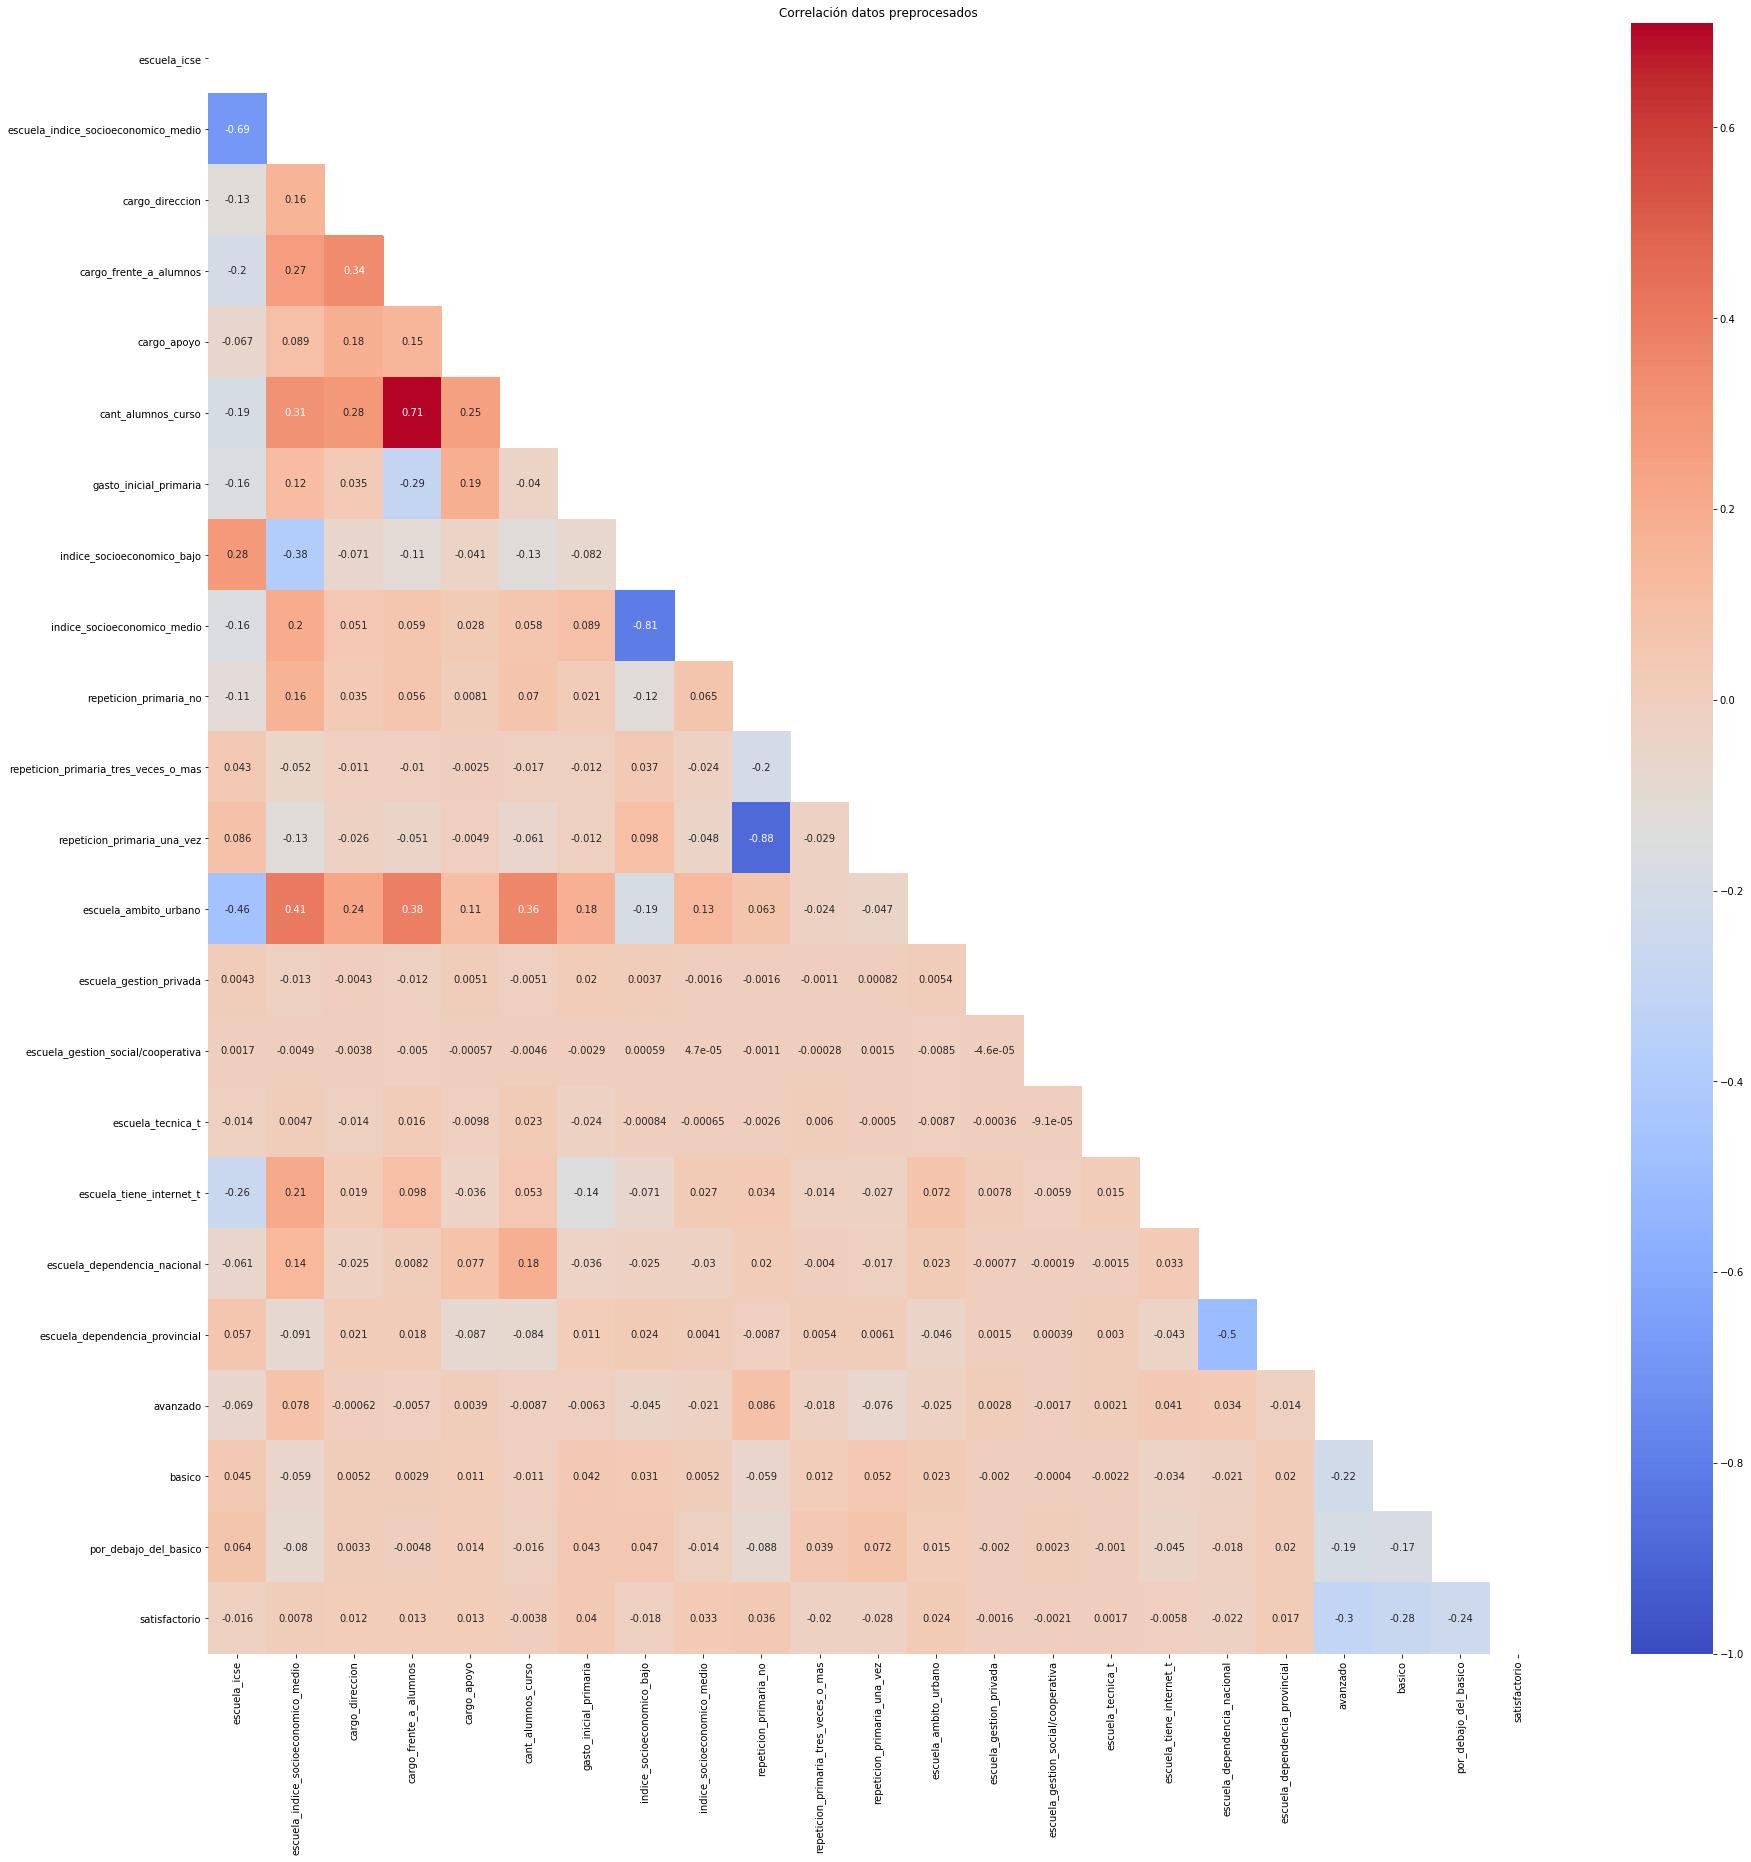

In [148]:
mask = np.zeros_like(data_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(30,30))
plt.title('Correlación datos preprocesados')
sns.heatmap(data_corr,
            vmin=-1,
            fmt='.2g',
            cmap='coolwarm',
            annot=True,
            mask = mask)

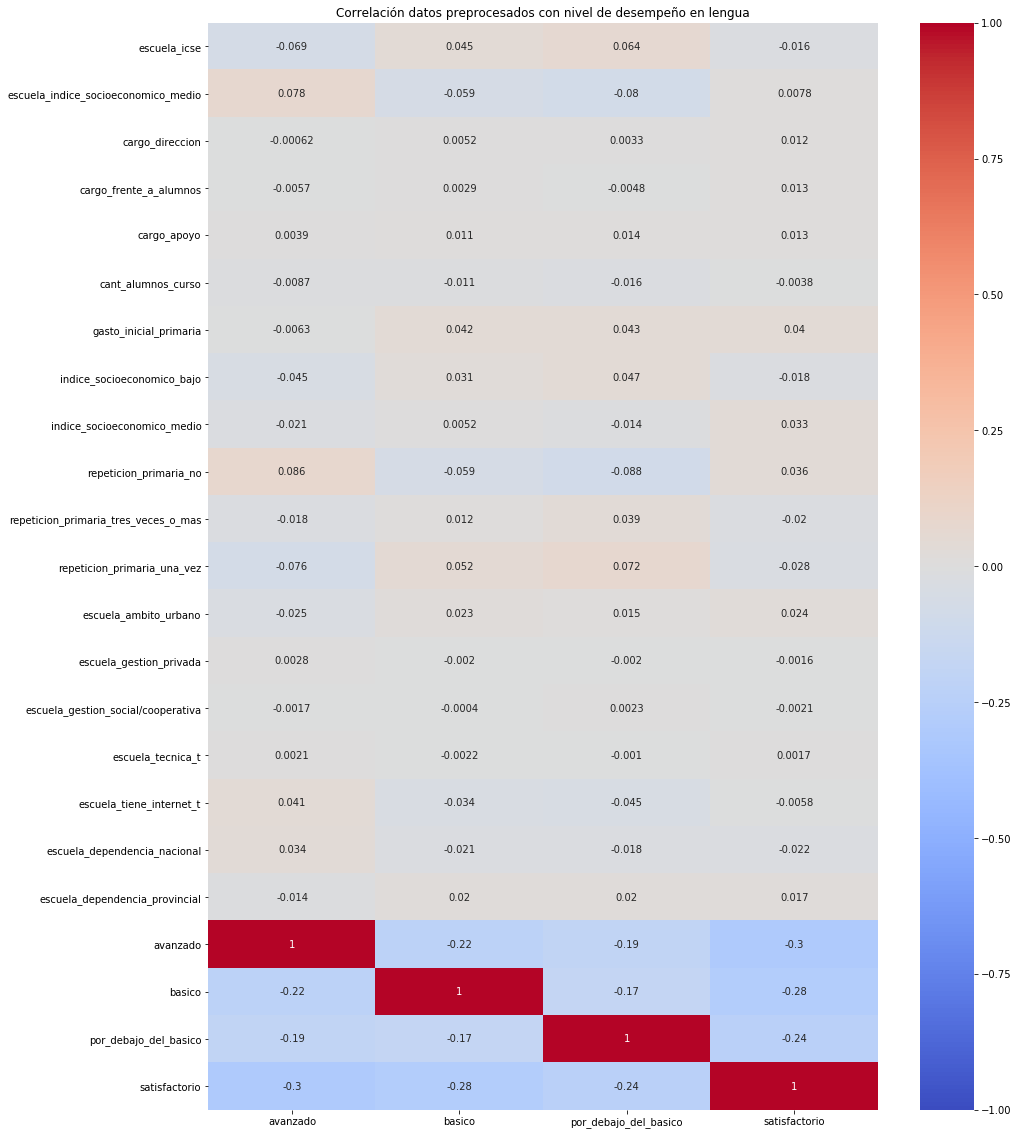

In [149]:
fig, ax = plt.subplots(figsize=(15, 20))
sns.heatmap(corr_lengua, cmap='coolwarm', annot=True, vmin=-1)
plt.title('Correlación datos preprocesados con nivel de desempeño en lengua')
plt.show()

# Modelo: 

Comenzaremos a modelar nuestras variables para explicar el desempeño de lengua de los alumnos nivel primario

## Train/Test split

Para este primer analisis decidimos enfocarnos en el nivel de desempeño satisfactorio

In [150]:
from sklearn.model_selection import train_test_split

In [151]:
data_prep_train = data_prep.drop(['avanzado','basico','por_debajo_del_basico'], axis=1)

In [152]:
X = data_prep_train.drop(['satisfactorio'], axis=1)
y = data_prep_train[['satisfactorio']]

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modelos

In [154]:
import statsmodels.api as sm

In [155]:
ols = sm.OLS(y_train,X_train)

In [156]:
results = ols.fit()

In [157]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          satisfactorio   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     86.41
Date:                Sat, 13 Jun 2020   Prob (F-statistic):          5.41e-319
Time:                        13:11:27   Log-Likelihood:            -3.6572e+05
No. Observations:              273792   AIC:                         7.315e+05
Df Residuals:                  273773   BIC:                         7.317e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
escuela_icse                             0.0482      0.014      3.516      0.000       0.021       0.075
escuela_indice_socioeconomico_medio      0.0293      0.008      3.701      0.000       0.014       0.045
cargo_direccion                        6.75e-05      0.001      0.079      0.937      -0.002       0.002
cargo_frente_a_alumnos                   0.0035      0.000     16.136      0.000       0.003       0.004
cargo_apoyo                              0.0022      0.001      3.125      0.002       0.001       0.004
cant_alumnos_curso                      -0.0001   7.81e-06    -14.611      0.000      -0.000   -9.88e-05
gasto_inicial_primaria                2.844e-12   1.33e-13     21.398      0.000    2.58e-12     3.1e-12
indice_socioeconomico_bajo               0.0950      0.008     12.121      0.000       0.080       0.110
indice_socioeconomico_medio              0.1226      0.007     18.324      0.000       0.109       0.136
repeticion_primaria_no                   0.1414      0.012     11.995      0.000       0.118       0.164
repeticion_primaria_tres_veces_o_mas    -0.0886      0.024     -3.630      0.000      -0.136      -0.041
repeticion_primaria_una_vez              0.0577      0.013      4.550      0.000       0.033       0.082
escuela_ambito_urbano                    0.0290      0.006      4.628      0.000       0.017       0.041
escuela_gestion_privada                 -0.1861      0.129     -1.443      0.149      -0.439       0.067
escuela_gestion_social/cooperativa      -0.4860      0.460     -1.056      0.291      -1.388       0.416
escuela_tecnica_t                        0.1755      0.067      2.604      0.009       0.043       0.308
escuela_tiene_internet_t                 0.0003      0.004      0.060      0.952      -0.008       0.009
escuela_dependencia_nacional            -0.0450      0.036     -1.246      0.213      -0.116       0.026
escuela_dependencia_provincial           0.1558      0.015     10.207      0.000       0.126       0.186
==============================================================================
Omnibus:                   166588.571   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3321036.644
Skew:                           2.573   Prob(JB):                         0.00
Kurtosis:                      19.268   Cond. No.                     6.06e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.06e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Hacer el preprocesamiento de está forma no nos resultó. Creemos que tomar estas 4 clases como variables dummies multiplicadas por el ponderador no va a funcionar bien para un modelo predictivo. Además el dataset no está muy balanceado, por lo tanto preprocesamos los datos de nuevo de la siguiente manera:

# Preprocesamiento

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1101518 entries, 0 to 1101517
Data columns (total 25 columns):
 #   Column                                   Non-Null Count    Dtype  
---  ------                                   --------------    -----  
 0   sexo                                     1101518 non-null  object 
 1   indice_socioeconomico                    1101518 non-null  object 
 2   nivel_desemp_lengua                      561632 non-null   object 
 3   ponderador_lengua                        1037569 non-null  float64
 4   repeticion_primaria                      1101518 non-null  object 
 5   escuela_id                               1101518 non-null  int64  
 6   nivel_id                                 1101518 non-null  int64  
 7   year_id                                  1101518 non-null  int64  
 8   escuela_ambito                           1101518 non-null  object 
 9   escuela_gestion                          1101518 non-null  object 
 10  escuela_icse      

### Seleccionamos columnas de interes y aplicamos filtros

In [159]:
columnas_de_interes = ['indice_socioeconomico','nivel_desemp_lengua','ponderador_lengua',
                      'repeticion_primaria','escuela_ambito','escuela_gestion', 'escuela_icse',
                       'escuela_indice_socioeconomico_medio','escuela_tecnica','escuela_tiene_internet',
                       'escuela_subvencion','escuela_dependencia','departamento_tasa_con_nbi',
                       'cargo_direccion', 'cargo_frente_a_alumnos', 'cargo_apoyo', 'cant_alumnos_curso',
                       'gasto_inicial_primaria']

data_np = data[columnas_de_interes] #Seleccionamos solo las columnas que nos interesan

filtro_desemp = data_np['nivel_desemp_lengua'].isin(['satisfactorio','avanzado','basico','por_debajo_del_basico'])
filtro_icse = data_np['escuela_icse'] > 0

data_np = data_np[(filtro_desemp) & (filtro_icse)]

In [160]:
data_np.shape[0]

342241

De los 1.101.518 registros que teniamos al comienzo, nos quedan 342.241 al aplicar filtros

No tomamos la columna sexo por el momento ya que como vimos en el análisis exploratorio, tiene un porcentaje alto de faltantes

### Datos nulos

#### isna()

In [161]:
na = data_np.isna().sum()
na = pd.DataFrame(na, columns=['null'])
na[na['null']>0]

,null
escuela_tiene_internet,19510
departamento_tasa_con_nbi,20
cargo_direccion,13362
cargo_frente_a_alumnos,3655
cargo_apoyo,119810
cant_alumnos_curso,261
gasto_inicial_primaria,11882


**escuela_tiene_internet**

In [162]:
data_np['escuela_tiene_internet'].value_counts()

t    236527
f     86204
Name: escuela_tiene_internet, dtype: int64

In [163]:
data_np['escuela_tiene_internet'] = data_np['escuela_tiene_internet'].fillna('t')

Por ahora completamos con t para no descartar este dato. Podríamos tambien completarlo basandonos en alguna variable económica de la escuela

***departamento_tasa_con_nbi***

In [164]:
data_np['departamento_tasa_con_nbi'].describe()

count   342221.00
mean        -0.18
std          0.48
min         -1.00
25%         -1.00
50%          0.06
75%          0.11
max          0.40
Name: departamento_tasa_con_nbi, dtype: float64

In [165]:
data_np[data_np['departamento_tasa_con_nbi'] == -1].shape[0]

86782

Esta columna tiene demasiados nulos por lo que decidimos descartarla por el momento para este primer análisis.

In [166]:
data_np = data_np.drop('departamento_tasa_con_nbi', axis=1)

***cargo_direccion***

In [167]:
data_np['cargo_direccion'].describe()

count   328879.00
mean         3.52
std          2.29
min          0.00
25%          2.00
50%          3.00
75%          4.00
max         52.00
Name: cargo_direccion, dtype: float64

In [168]:
data_np['cargo_direccion'] = data_np['cargo_direccion'].fillna(3)

Completamos en este caso para cargo_direccion con el valor del cuartil 2 (3)

***cargo_frente_a_alumnos***

In [169]:
data_np['cargo_frente_a_alumnos'].describe()

count   338586.00
mean        24.92
std         13.58
min          0.00
25%         16.00
50%         23.00
75%         32.00
max        108.00
Name: cargo_frente_a_alumnos, dtype: float64

In [170]:
data_np['cargo_frente_a_alumnos'] = data_np['cargo_frente_a_alumnos'].fillna(23)

También completamos con el valor del cuartil 2 (23)

***cargo_apoyo***

In [171]:
data_np['cargo_apoyo'].describe()

count   222431.00
mean         3.68
std          3.26
min          0.00
25%          2.00
50%          3.00
75%          5.00
max         65.00
Name: cargo_apoyo, dtype: float64

In [172]:
data_np['cargo_apoyo'] = data_np['cargo_apoyo'].fillna(3)

Tambien completamos con valor del cuartil 2 (3)

***cant_alumnos_curso***

In [173]:
data_np['cant_alumnos_curso'].describe()

count   341980.00
mean       494.59
std        348.77
min          1.00
25%        279.00
50%        450.00
75%        633.25
max       4022.00
Name: cant_alumnos_curso, dtype: float64

In [174]:
data_np['cant_alumnos_curso'] = data_np['cant_alumnos_curso'].fillna(450)

***gasto_inicial_primaria***

In [175]:
data_np['gasto_inicial_primaria'].describe()

count        330359.00
mean    16914376852.45
std     16115054041.24
min      1193766949.00
25%      4764915887.00
50%      9683129447.00
75%     40563029196.00
max     40563029196.00
Name: gasto_inicial_primaria, dtype: float64

In [176]:
data_np['gasto_inicial_primaria'] = data_np['gasto_inicial_primaria'].fillna(16914376852.45)

En este caso usamos la media para competar -> 16914376852.45

#### nc

In [177]:
miss = miss_data(data_np, 'nc')
miss[miss.cantidad > 0]

,cantidad,porcentaje
variable,,
indice_socioeconomico,62605,18.29
repeticion_primaria,24794,7.24


***indice_socioeconomico***

In [178]:
data_np['indice_socioeconomico'].value_counts()

medio    192041
bajo      62644
nc        62605
alto      24951
Name: indice_socioeconomico, dtype: int64

In [179]:
map_is = {'nc':'medio','medio':'medio','bajo':'bajo','alto':'alto'}
data_np['indice_socioeconomico'] = data_np['indice_socioeconomico'].map(map_is)

Completamos con el valor más frecuente

***repeticion_primaria***

In [180]:
data_np['repeticion_primaria'].value_counts()

no                  270491
una_vez              37661
nc                   24794
dos_veces             7033
tres_veces_o_mas      2262
Name: repeticion_primaria, dtype: int64

In [181]:
map_rep = {'nc':'no', 'no':'no','una_vez':'una_vez','dos_veces':'dos_veces','tres_veces_o_mas':'tres_veces_o_mas'}
data_np['repeticion_primaria'] = data_np['repeticion_primaria'].map(map_rep)

Completamos con el valor más frecuente

#### No corresponde

In [182]:
miss = miss_data(data_np, 'No corresponde')
miss[miss.cantidad > 0]

,cantidad,porcentaje
variable,,
escuela_subvencion,342241,100.00


***escuela_subvencion***

In [183]:
data_np['escuela_subvencion'].value_counts()

No corresponde    342241
Name: escuela_subvencion, dtype: int64

En este caso, el valor es siempre 'No corresponde' por lo que descartamos la variable

In [184]:
data_np = data_np.drop('escuela_subvencion', axis=1)

#### -1

In [185]:
miss = miss_data(data_np, -1)
miss[miss.cantidad > 0]

,cantidad,porcentaje
variable,,
escuela_indice_socioeconomico_medio,819,0.24


***escuela_indice_socioeconomico_medio***

In [186]:
data_np['escuela_indice_socioeconomico_medio'].describe()

count   342241.00
mean         1.85
std          0.29
min         -1.00
25%          1.74
50%          1.88
75%          2.00
max          3.00
Name: escuela_indice_socioeconomico_medio, dtype: float64

In [187]:
data_np.escuela_indice_socioeconomico_medio = data_np.escuela_indice_socioeconomico_medio.replace(-1, 1.85)

En este caso completamos con la media

***Controlamos que no hayan quedado nulos***

In [188]:
data_np.isna().sum()

indice_socioeconomico                  0
nivel_desemp_lengua                    0
ponderador_lengua                      0
repeticion_primaria                    0
escuela_ambito                         0
escuela_gestion                        0
escuela_icse                           0
escuela_indice_socioeconomico_medio    0
escuela_tecnica                        0
escuela_tiene_internet                 0
escuela_dependencia                    0
cargo_direccion                        0
cargo_frente_a_alumnos                 0
cargo_apoyo                            0
cant_alumnos_curso                     0
gasto_inicial_primaria                 0
dtype: int64

In [189]:
miss = miss_data(data_np, 'nc')
miss[miss.cantidad > 0]

,cantidad,porcentaje
variable,,


In [190]:
miss = miss_data(data_np, 'No corresponde')
miss[miss.cantidad > 0]

,cantidad,porcentaje
variable,,


In [191]:
miss = miss_data(data_np, -1)
miss[miss.cantidad > 0]

,cantidad,porcentaje
variable,,


### Creación variables dummy para features de entrada

In [192]:
target_name = 'nivel_desemp_lengua'

In [193]:
categorical = [col for col in data_np.columns if (data_np[col].dtypes == 'object') & (col != target_name)]

In [194]:
dummies = pd.get_dummies(data_np[categorical], drop_first=True)

In [195]:
data_np = pd.concat([data_np, dummies], axis=1).drop(categorical, axis=1)

In [196]:
data_np.head()

,nivel_desemp_lengua,ponderador_lengua,escuela_icse,escuela_indice_socioeconomico_medio,cargo_direccion,cargo_frente_a_alumnos,cargo_apoyo,cant_alumnos_curso,gasto_inicial_primaria,indice_socioeconomico_bajo,...,repeticion_primaria_no,repeticion_primaria_tres_veces_o_mas,repeticion_primaria_una_vez,escuela_ambito_urbano,escuela_gestion_privada,escuela_gestion_social/cooperativa,escuela_tecnica_t,escuela_tiene_internet_t,escuela_dependencia_nacional,escuela_dependencia_provincial
1,basico,3.47,0.31,1.80,3.00,27.00,4.00,474.00,9998134731.00,0,...,1,0,0,1,0,0,0,1,0,1
4,avanzado,1.70,0.04,2.39,5.00,58.00,3.00,656.00,9998134731.00,0,...,1,0,0,1,0,0,0,1,0,1
5,satisfactorio,2.07,0.22,1.86,3.00,29.00,4.00,328.00,9998134731.00,0,...,1,0,0,1,0,0,0,1,0,1
6,satisfactorio,1.69,0.13,1.84,3.00,28.00,5.00,331.00,9998134731.00,0,...,1,0,0,1,0,0,0,1,0,1
12,satisfactorio,3.15,0.09,2.00,3.00,15.00,2.00,184.00,9998134731.00,0,...,1,0,0,1,0,0,0,1,0,1


## Target

Hacemos la prueba de analizar la variable objetivo asignándole valores del 1 al 4:

In [197]:
desemp_map = {
    'por_debajo_del_basico': 1,
    'basico': 2,
    'satisfactorio':3,
    'avanzado':4
}
data_np['nivel_desemp_lengua'] = data_np['nivel_desemp_lengua'].map(desemp_map)

In [198]:
data_np.head(3)

,nivel_desemp_lengua,ponderador_lengua,escuela_icse,escuela_indice_socioeconomico_medio,cargo_direccion,cargo_frente_a_alumnos,cargo_apoyo,cant_alumnos_curso,gasto_inicial_primaria,indice_socioeconomico_bajo,...,repeticion_primaria_no,repeticion_primaria_tres_veces_o_mas,repeticion_primaria_una_vez,escuela_ambito_urbano,escuela_gestion_privada,escuela_gestion_social/cooperativa,escuela_tecnica_t,escuela_tiene_internet_t,escuela_dependencia_nacional,escuela_dependencia_provincial
1,2,3.47,0.31,1.80,3.00,27.00,4.00,474.00,9998134731.00,0,...,1,0,0,1,0,0,0,1,0,1
4,4,1.70,0.04,2.39,5.00,58.00,3.00,656.00,9998134731.00,0,...,1,0,0,1,0,0,0,1,0,1
5,3,2.07,0.22,1.86,3.00,29.00,4.00,328.00,9998134731.00,0,...,1,0,0,1,0,0,0,1,0,1


### Cargos por cantidad de alumnos

Tenemos la cantidad de alumnos por curso, y los cargos cubiertos. Calculamos la cantidad de estos cargos cubiertos por cada alumno

In [199]:
data_np['cargo_apoyo_por_alumno'] = data_np['cargo_apoyo'] / data_np['cant_alumnos_curso']
data_np['cargo_direccion_por_alumno'] = data_np['cargo_direccion'] / data_np['cant_alumnos_curso']
data_np['cargo_frente_por_alumno'] = data_np['cargo_frente_a_alumnos'] / data_np['cant_alumnos_curso']
data_np = data_np.drop(['cargo_apoyo','cargo_direccion','cargo_frente_a_alumnos','cant_alumnos_curso'], axis=1)

# Análisis de los datos preprocesados

In [200]:
data_processed = data_np.copy()

## Descripción 

In [201]:
data_processed.describe()

,nivel_desemp_lengua,ponderador_lengua,escuela_icse,escuela_indice_socioeconomico_medio,gasto_inicial_primaria,indice_socioeconomico_bajo,indice_socioeconomico_medio,repeticion_primaria_no,repeticion_primaria_tres_veces_o_mas,repeticion_primaria_una_vez,escuela_ambito_urbano,escuela_gestion_privada,escuela_gestion_social/cooperativa,escuela_tecnica_t,escuela_tiene_internet_t,escuela_dependencia_nacional,escuela_dependencia_provincial,cargo_apoyo_por_alumno,cargo_direccion_por_alumno,cargo_frente_por_alumno
count,342241.00,342241.00,342241.00,342241.00,342241.00,342241.00,342241.00,342241.00,342241.00,342241.00,342241.00,342241.00,342241.00,342241.00,342241.00,342241.00,342241.00,342241.00,342241.00,342241.00
mean,2.70,1.61,0.32,1.86,16914376852.45,0.18,0.74,0.86,0.01,0.11,0.86,0.00,0.00,0.00,0.75,0.00,0.99,0.02,0.01,0.08
std,1.03,0.88,0.16,0.25,15832839042.72,0.39,0.44,0.34,0.08,0.31,0.35,0.01,0.00,0.03,0.43,0.06,0.11,0.05,0.05,0.34
min,1.00,1.00,0.03,1.00,1193766949.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2.00,1.10,0.20,1.74,4802625581.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.01,0.04
50%,3.00,1.32,0.29,1.88,9683129447.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.01,0.01,0.05
75%,4.00,1.73,0.41,2.00,40563029196.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.01,0.01,0.07
max,4.00,25.92,0.91,3.00,40563029196.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3.00,3.00,23.00


## Correlación

Comenzamos por armar un modelo de prueba asumiendo que los niveles de desempeño se pueden medir de 1 a 4 y sin aplicar ponderadores (esto no es necesariamente representativo de toda la población):

### Todas las variables

In [202]:
target_col_names = ['nivel_desemp_lengua']

In [203]:
data_corr = data_processed.drop('ponderador_lengua',axis=1).corr()
corr_lengua = data_processed.drop('ponderador_lengua',axis=1).corr()[target_col_names][:] 

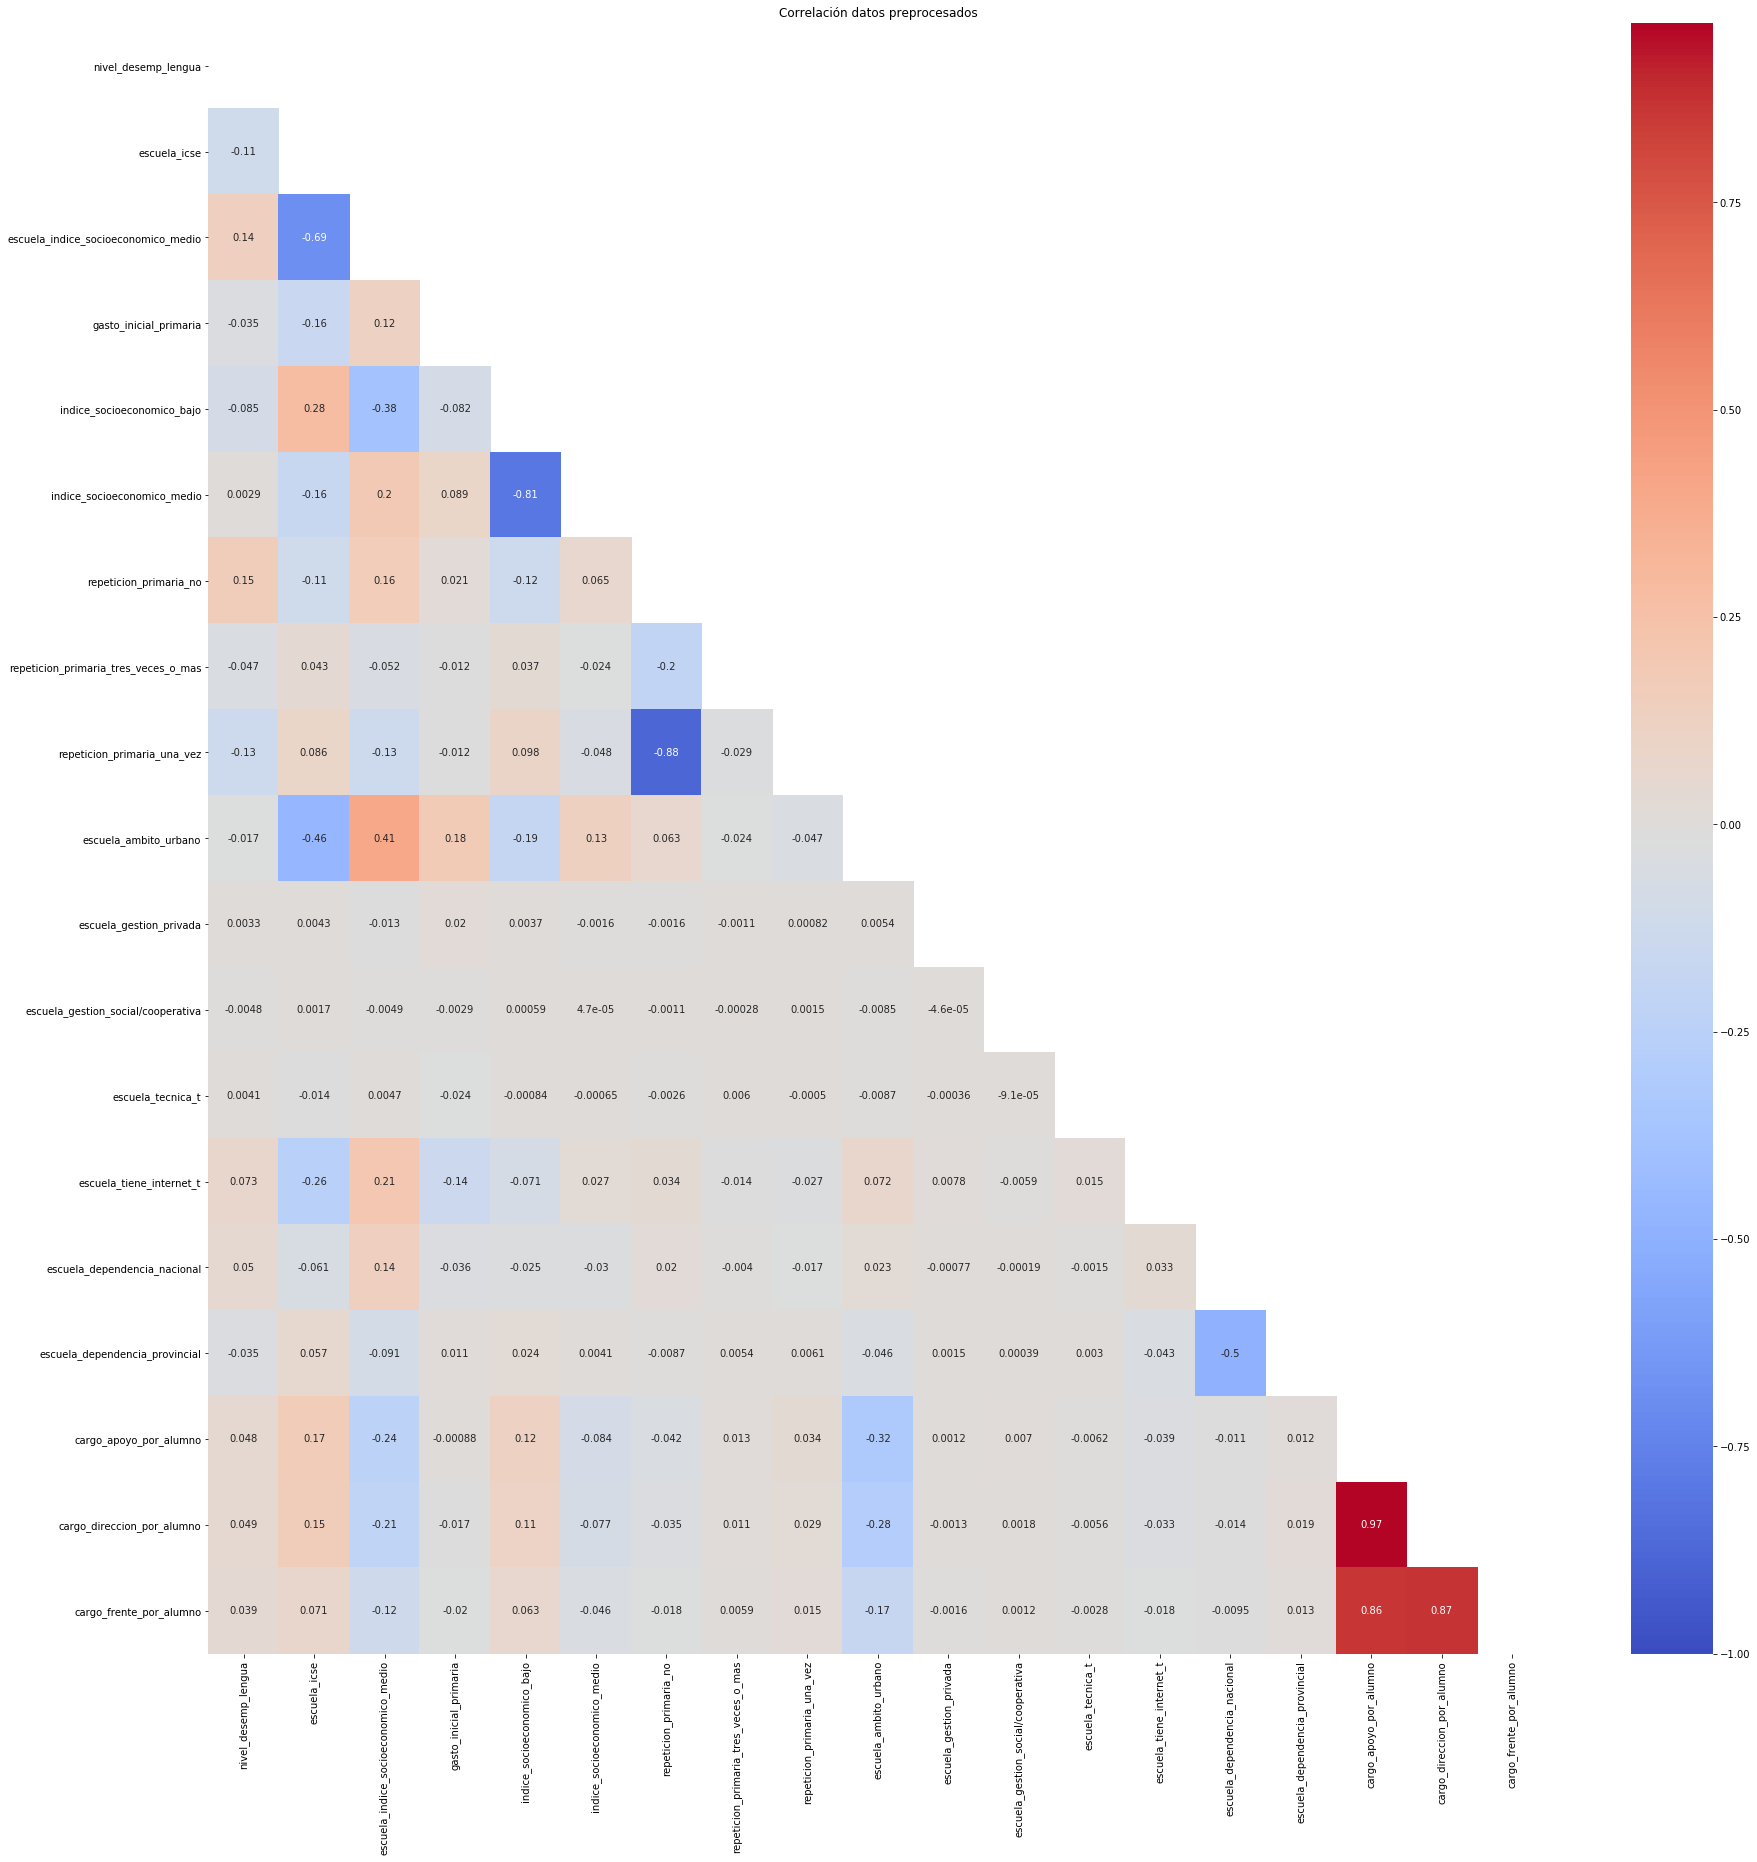

In [204]:
mask = np.zeros_like(data_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(30,30))
plt.title('Correlación datos preprocesados')
sns.heatmap(data_corr,
            vmin=-1,
            fmt='.2g',
            cmap='coolwarm',
            annot=True,
            mask = mask)

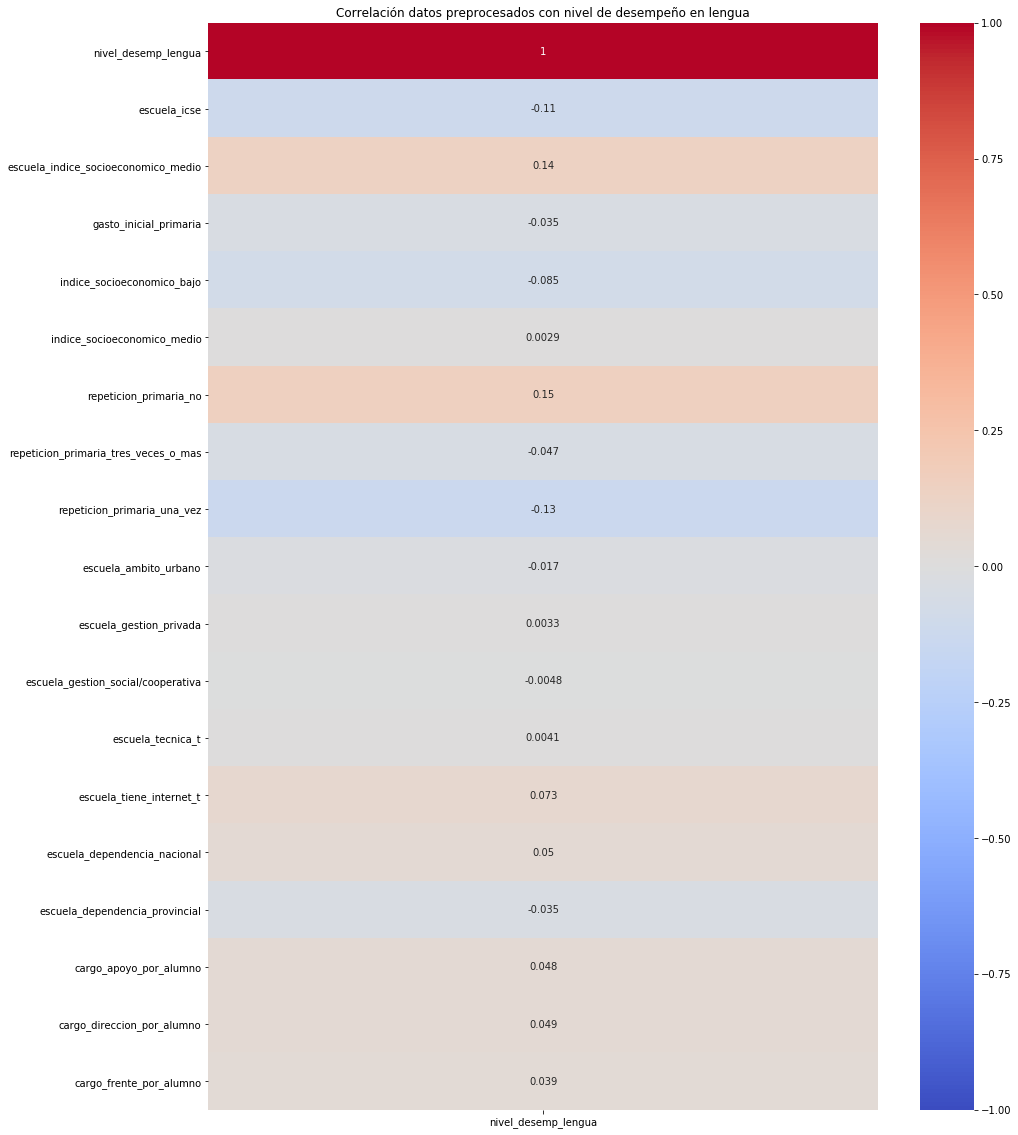

In [205]:
fig, ax = plt.subplots(figsize=(15, 20))
sns.heatmap(corr_lengua, cmap='coolwarm', annot=True, vmin=-1)
plt.title('Correlación datos preprocesados con nivel de desempeño en lengua')
plt.show()

# Train/Test split

In [206]:
data_shuffle = data_processed.sample(frac=1)

In [207]:
data_shuffle.head(3)

,nivel_desemp_lengua,ponderador_lengua,escuela_icse,escuela_indice_socioeconomico_medio,gasto_inicial_primaria,indice_socioeconomico_bajo,indice_socioeconomico_medio,repeticion_primaria_no,repeticion_primaria_tres_veces_o_mas,repeticion_primaria_una_vez,escuela_ambito_urbano,escuela_gestion_privada,escuela_gestion_social/cooperativa,escuela_tecnica_t,escuela_tiene_internet_t,escuela_dependencia_nacional,escuela_dependencia_provincial,cargo_apoyo_por_alumno,cargo_direccion_por_alumno,cargo_frente_por_alumno
166871,4,1.05,0.48,1.59,5958320664.00,0,0,1,0,0,0,0,0,0,1,0,1,0.01,0.01,0.05
551082,3,1.34,0.30,1.79,40563029196.00,0,1,1,0,0,1,0,0,0,0,0,1,0.01,0.01,0.03
194734,1,2.83,0.32,1.67,1773251418.00,0,1,1,0,0,1,0,0,0,0,0,1,0.01,0.01,0.08


In [208]:
size = data_shuffle.shape[0]
train_size = round(size * 0.85)

El metodo sample lo usamos para que se mezclen las filas y no obtener todas filas del mismo año por ejemplo.

In [209]:
X = data_shuffle.drop(['nivel_desemp_lengua','ponderador_lengua'], axis=1)
y = data_shuffle[['nivel_desemp_lengua']]
ponder = data_shuffle[['ponderador_lengua']]

In [210]:
X_train = X[:train_size]
y_train = y[:train_size]
ponder_train = ponder[:train_size]

In [211]:
X_test = X[train_size:]
y_test = y[train_size:]
ponder_test = ponder[train_size:]

# Modelos

A continuación, probaremos diversos modelos para intentar explicar la performance de los alumnos en lengua.

Elegimos arrancar con un random forest simple, sin mucha optimización de hiperparámetros, para poder encontrar sobre todo que importancia tiene cada una de las features que seleccionamos.

## Random forest con sample_weights

https://blogs.worldbank.org/impactevaluations/tools-of-the-trade-when-to-use-those-sample-weights

In [212]:
from sklearn.ensemble import RandomForestClassifier

clf_sample_weight = RandomForestClassifier(n_estimators=250, min_samples_leaf=100, random_state=33)

In [213]:
clf_sample_weight.fit(X_train, y_train, sample_weight=ponder_train.values.flatten())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=33, verbose=0,
                       warm_start=False)

In [214]:
clf_sample_weight.score(X_test, y_test, sample_weight=ponder_test.values.flatten())

0.38695665944482494

El modelo utilizando estas variables tiene un poder explicativo bajo (0.386), sin embargo es una buena primera aproximación y nos permitirá entender la importancia de nuestras variables en la predicción del resultado.

#### Importancia de las features

Text(0.5, 0, 'Importance')

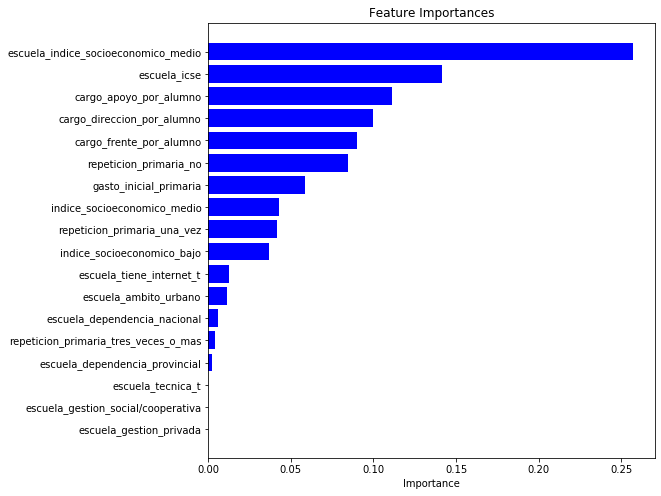

In [215]:
features= X.columns
importances = clf_sample_weight.feature_importances_
indices = np.argsort(importances)

plt.figure(1, figsize=(8, 8))
plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Importance')

#### Matriz de confusión

In [216]:
from sklearn.metrics import confusion_matrix

test_preds = clf_sample_weight.predict(X_test)
conf_matrix = confusion_matrix(y_test, test_preds)

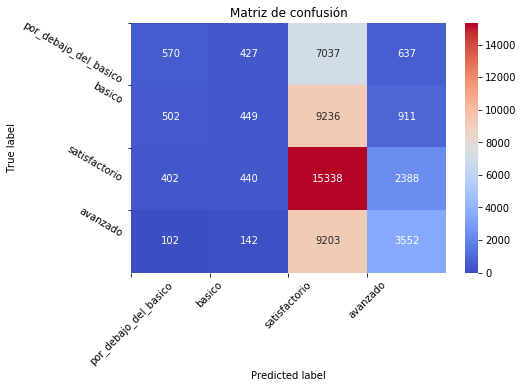

In [217]:
import itertools
sns.heatmap(conf_matrix, annot=True, vmin=0,fmt='g', cmap='coolwarm',)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
classes = ['por_debajo_del_basico','basico','satisfactorio','avanzado']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes, rotation=-30)
plt.title('Matriz de confusión')
plt.show()

## Random forest sin sample_weights

Decidimos entender también si el ponderamiento tiene un efecto en en nivel predictivo del modelo.

In [218]:
clf_no_sample_weight = RandomForestClassifier(n_estimators=250, min_samples_leaf=100, random_state=33)

In [219]:
clf_no_sample_weight.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=33, verbose=0,
                       warm_start=False)

In [220]:
clf_no_sample_weight.score(X_test, y_test)

0.3881681471092411

#### Importancia de las features

Text(0.5, 0, 'Importance')

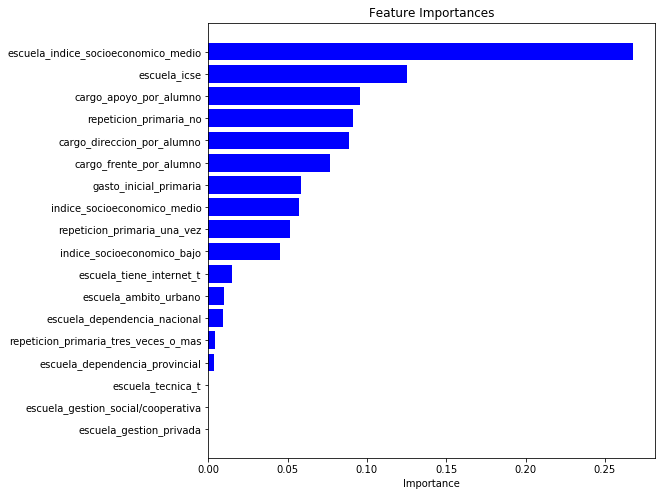

In [221]:
features= X.columns
importances = clf_no_sample_weight.feature_importances_
indices = np.argsort(importances)

plt.figure(1, figsize=(8, 8))
plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Importance')

#### Matriz de confusión

In [222]:
test_preds = clf_no_sample_weight.predict(X_test)
conf_matrix = confusion_matrix(y_test, test_preds)

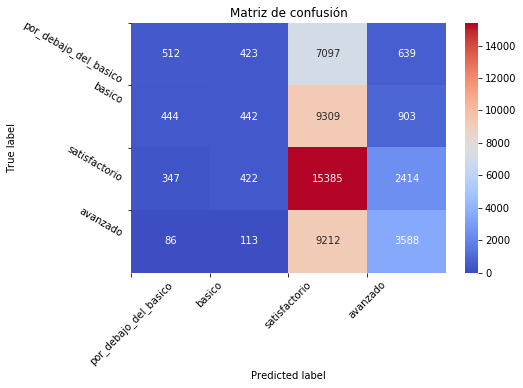

In [223]:
sns.heatmap(conf_matrix, annot=True, vmin=0,fmt='g', cmap='coolwarm',)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
classes = ['por_debajo_del_basico','basico','satisfactorio','avanzado']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes, rotation=-30)
plt.title('Matriz de confusión')
plt.show()

No podemos predecir el desempeño con las variables que tenemos y la manera en la que las procesamos hasta el momento.

Además, sin importar si aplicamos o no los ponderadores, obtenemos resultados muy similares.

Proseguimos a analizar los datos y tratamos de buscar clusters.

## Clusters

Vamos a hacer un análisis de clusters para ver que similitudes encontramos entre los distintos grupos que se forman. Queremos ver por ejemplo, si alumnos que entran en un mismo cluster, tienen niveles de desempeño similares.

Arrancamos con un KMeans.

### Escalamos los datos

In [224]:
data_clusters = data_shuffle.copy()

In [225]:
size = data_clusters.shape[0]
train_size = round(size * 0.85)

In [226]:
X = data_clusters.drop(['ponderador_lengua'], axis=1)
ponder = data_clusters[['ponderador_lengua']]

Para KMeans al igual que otros modelos como KNN es importante escalar los datos ya que se usan distancias euclidianas

In [227]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
X[:2]

array([[ 1.26430375,  1.03580632, -1.07742096, -0.69198406, -0.47334031,
        -1.70501723,  0.39877218, -0.08156808, -0.35163754, -2.4743292 ,
        -0.01346075, -0.00341874, -0.02649061,  0.58024625, -0.0569396 ,
         0.11372744, -0.09158564, -0.06951102, -0.09866934],
       [ 0.29287311, -0.06743618, -0.2966895 ,  1.49364791, -0.47334031,
         0.58650434,  0.39877218, -0.08156808, -0.35163754,  0.40414994,
        -0.01346075, -0.00341874, -0.02649061, -1.72340622, -0.0569396 ,
         0.11372744, -0.194816  , -0.17604063, -0.13913611]])

### KMeans

In [228]:
from sklearn.cluster import KMeans

Buscamos la cantidad de clusters que mejor separe estos datos

In [229]:
lista_distancias_medias = []
K = [2,3,4,5,6,7,8,9,10]
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X, sample_weight=ponder.values.flatten())
    distancia_total = km.inertia_
    distancia_media = distancia_total/len(X)
    lista_distancias_medias.append(distancia_media)

Graficamos al distancia media (inercia) en función al número de clusters

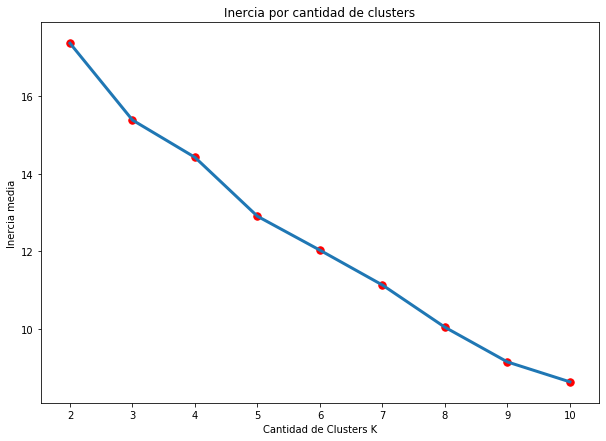

In [230]:
plt.figure(figsize = (10,7))
plt.plot(K,lista_distancias_medias, lw=3)
plt.scatter(K,lista_distancias_medias,s=55,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Inercia media')
plt.title('Inercia por cantidad de clusters')
plt.show()

Según nuestro criterio, no encontramos un número de clusters "optimo" con estas features. No vemos un "codo" en donde podamos decidir que ese es el número óptimo de K.

Tomamos otro subconjunto de features y tratamos de separar en clusters teniendo en cuenta estas variables:

#### Selección de features

In [231]:
data_clusters.columns

Index(['nivel_desemp_lengua', 'ponderador_lengua', 'escuela_icse',
       'escuela_indice_socioeconomico_medio', 'gasto_inicial_primaria',
       'indice_socioeconomico_bajo', 'indice_socioeconomico_medio',
       'repeticion_primaria_no', 'repeticion_primaria_tres_veces_o_mas',
       'repeticion_primaria_una_vez', 'escuela_ambito_urbano',
       'escuela_gestion_privada', 'escuela_gestion_social/cooperativa',
       'escuela_tecnica_t', 'escuela_tiene_internet_t',
       'escuela_dependencia_nacional', 'escuela_dependencia_provincial',
       'cargo_apoyo_por_alumno', 'cargo_direccion_por_alumno',
       'cargo_frente_por_alumno'],
      dtype='object')

In [232]:
feat_list = ['escuela_icse','escuela_indice_socioeconomico_medio','cargo_frente_por_alumno','cargo_apoyo_por_alumno',
            'indice_socioeconomico_medio','indice_socioeconomico_bajo','nivel_desemp_lengua',
            'repeticion_primaria_una_vez','repeticion_primaria_no','repeticion_primaria_tres_veces_o_mas']
X = data_clusters[feat_list]
ponder = data_clusters[['ponderador_lengua']]

#### Escalamos datos

In [233]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
X[:2]

array([[ 1.03580632, -1.07742096, -0.09866934, -0.09158564, -1.70501723,
        -0.47334031,  1.26430375, -0.35163754,  0.39877218, -0.08156808],
       [-0.06743618, -0.2966895 , -0.13913611, -0.194816  ,  0.58650434,
        -0.47334031,  0.29287311, -0.35163754,  0.39877218, -0.08156808]])

#### Analizamos la inercia 

Analizamos la inercia con este conjunto de features para ver si podemos distinguir mejor los clusters

In [234]:
lista_distancias_medias = []
K = [2,3,4,5,6,7,8,9,10]
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X, sample_weight=ponder.values.flatten())
    distancia_total = km.inertia_
    distancia_media = distancia_total/len(X)
    lista_distancias_medias.append(distancia_media)

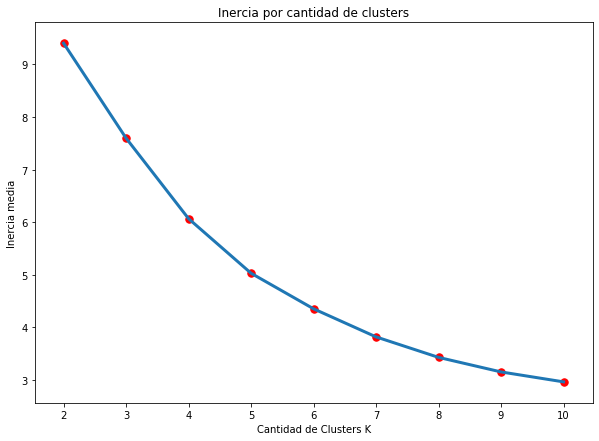

In [235]:
plt.figure(figsize = (10,7))
plt.plot(K,lista_distancias_medias, lw=3)
plt.scatter(K,lista_distancias_medias,s=55,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Inercia media')
plt.title('Inercia por cantidad de clusters')
plt.show()

Creemos que se podría dividir en 4/5 clusters. Vamos a tomar 5 en un principio.

In [236]:
km = KMeans(n_clusters=5, n_jobs=-1).fit(X)

In [237]:
inverse_scale = scaler.inverse_transform(X)

In [238]:
assigned_clusters = km.predict(X)

In [239]:
assigned_clusters = pd.DataFrame(assigned_clusters, columns=['cluster'])

In [240]:
clusters_result = pd.concat([pd.DataFrame(inverse_scale, columns=feat_list), assigned_clusters], axis=1)

In [241]:
cluster_1 = clusters_result[clusters_result.cluster == 0]

In [242]:
cluster_2 = clusters_result[clusters_result.cluster == 1]

In [243]:
cluster_3 = clusters_result[clusters_result.cluster == 2]

In [244]:
cluster_4 = clusters_result[clusters_result.cluster == 3]

In [245]:
cluster_5 = clusters_result[clusters_result.cluster == 4]

### Cluster 1

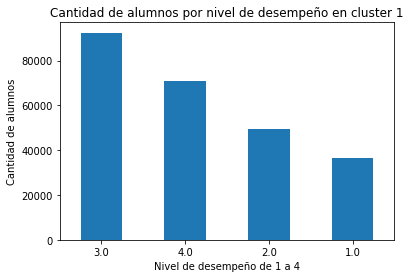

In [246]:
cluster_1.nivel_desemp_lengua.value_counts().plot(kind='bar')
plt.title('Cantidad de alumnos por nivel de desempeño en cluster 1')
plt.xlabel('Nivel de desempeño de 1 a 4',rotation=0)
plt.xticks(rotation=0)
plt.ylabel('Cantidad de alumnos')
plt.show()

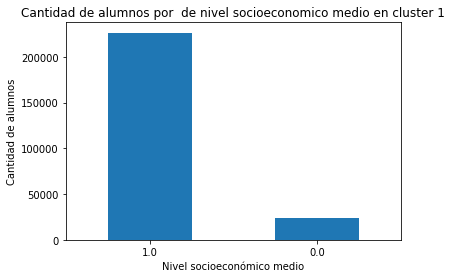

In [247]:
cluster_1.indice_socioeconomico_medio.value_counts().plot(kind='bar')
plt.title('Cantidad de alumnos por  de nivel socioeconomico medio en cluster 1')
plt.xlabel('Nivel socioeconómico medio',rotation=0)
plt.xticks(rotation=0)
plt.ylabel('Cantidad de alumnos')
plt.show()

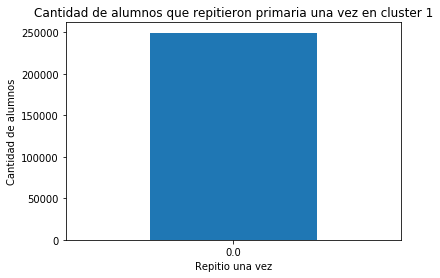

In [248]:
cluster_1.repeticion_primaria_una_vez.value_counts().plot(kind='bar')
plt.title('Cantidad de alumnos que repitieron primaria una vez en cluster 1')
plt.xlabel('Repitio una vez',rotation=0)
plt.xticks(rotation=0)
plt.ylabel('Cantidad de alumnos')
plt.show()

Todos los alumnos de este cluster repitieron primaria. La mayoría son de un nivel socioeconómico medio.

En el cluster 1 pudimos identificar como tendencia que los alumnos repitieron primaria. No encontramos tendencias en el  nivel de desempeño.

### Cluster 2

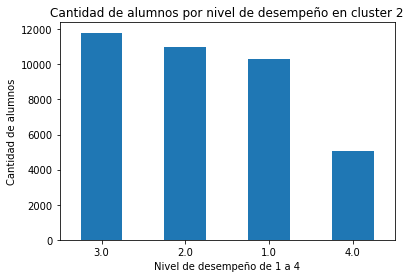

In [249]:
cluster_2.nivel_desemp_lengua.value_counts().plot(kind='bar')
plt.title('Cantidad de alumnos por nivel de desempeño en cluster 2')
plt.xlabel('Nivel de desempeño de 1 a 4',rotation=0)
plt.xticks(rotation=0)
plt.ylabel('Cantidad de alumnos')
plt.show()

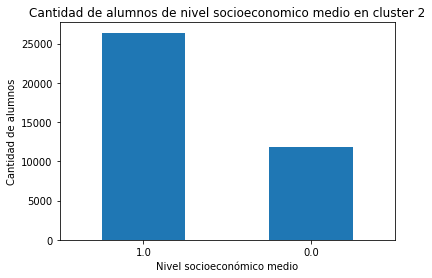

In [250]:
cluster_2.indice_socioeconomico_medio.value_counts().plot(kind='bar')
plt.title('Cantidad de alumnos de nivel socioeconomico medio en cluster 2')
plt.xlabel('Nivel socioeconómico medio',rotation=0)
plt.xticks(rotation=0)
plt.ylabel('Cantidad de alumnos')
plt.show()

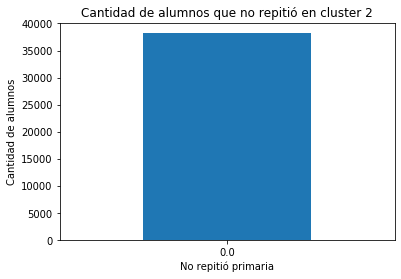

In [251]:
cluster_2.repeticion_primaria_no.value_counts().plot(kind='bar')
plt.title('Cantidad de alumnos que no repitió en cluster 2')
plt.xlabel('No repitió primaria',rotation=0)
plt.xticks(rotation=0)
plt.ylabel('Cantidad de alumnos')
plt.show()

En este cluster están los alumnos que son de un nivel socioeconómico medio y que no repitieron.

### Cluster 3

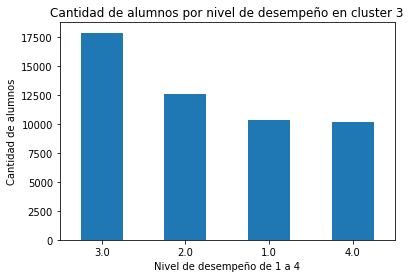

In [252]:
cluster_3.nivel_desemp_lengua.value_counts().plot(kind='bar')
plt.title('Cantidad de alumnos por nivel de desempeño en cluster 3')
plt.xlabel('Nivel de desempeño de 1 a 4',rotation=0)
plt.xticks(rotation=0)
plt.ylabel('Cantidad de alumnos')
plt.show()

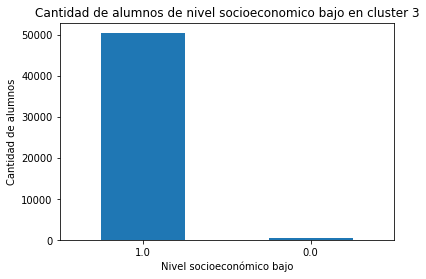

In [253]:
cluster_3.indice_socioeconomico_bajo.value_counts().plot(kind='bar')
plt.title('Cantidad de alumnos de nivel socioeconomico bajo en cluster 3')
plt.xlabel('Nivel socioeconómico bajo',rotation=0)
plt.xticks(rotation=0)
plt.ylabel('Cantidad de alumnos')
plt.show()

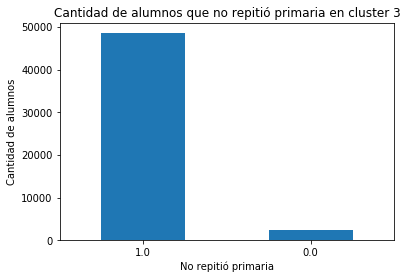

In [254]:
cluster_3.repeticion_primaria_no.value_counts().plot(kind='bar')
plt.title('Cantidad de alumnos que no repitió primaria en cluster 3')
plt.xlabel('No repitió primaria',rotation=0)
plt.xticks(rotation=0)
plt.ylabel('Cantidad de alumnos')
plt.show()

En el cluster 3, tenemos a los alumnos que no repitieron primaria y que son de un nivel socioeconómico bajo

### Cluster 4

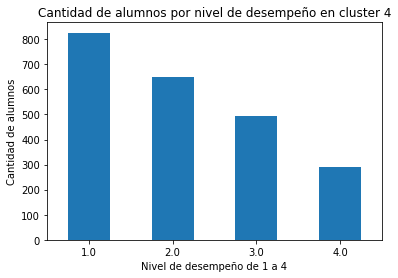

In [255]:
cluster_4.nivel_desemp_lengua.value_counts().plot(kind='bar')
plt.title('Cantidad de alumnos por nivel de desempeño en cluster 4')
plt.xlabel('Nivel de desempeño de 1 a 4',rotation=0)
plt.xticks(rotation=0)
plt.ylabel('Cantidad de alumnos')
plt.show()

Estos alumnos del cluster 4 tienen sobre todo nivel de desempeño bajo

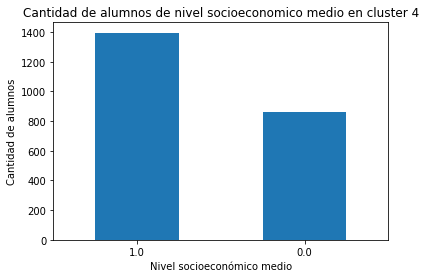

In [256]:
cluster_4.indice_socioeconomico_medio.value_counts().plot(kind='bar')
plt.title('Cantidad de alumnos de nivel socioeconomico medio en cluster 4')
plt.xlabel('Nivel socioeconómico medio',rotation=0)
plt.xticks(rotation=0)
plt.ylabel('Cantidad de alumnos')
plt.show()

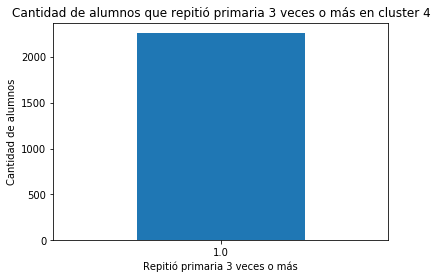

In [257]:
cluster_4.repeticion_primaria_tres_veces_o_mas.value_counts().plot(kind='bar')
plt.title('Cantidad de alumnos que repitió primaria 3 veces o más en cluster 4')
plt.xlabel('Repitió primaria 3 veces o más',rotation=0)
plt.xticks(rotation=0)
plt.ylabel('Cantidad de alumnos')
plt.show()

Los alumnos del cluster 4 repitieron primaria 3 veces o más. Pertenecen sobre todo a un indice socioeconómico medio

## Cluster 5

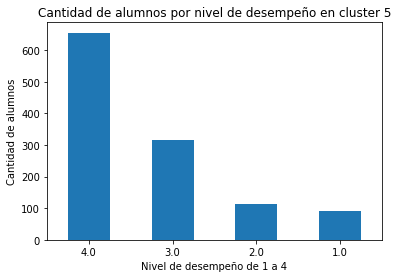

In [258]:
cluster_5.nivel_desemp_lengua.value_counts().plot(kind='bar')
plt.title('Cantidad de alumnos por nivel de desempeño en cluster 5')
plt.xlabel('Nivel de desempeño de 1 a 4',rotation=0)
plt.xticks(rotation=0)
plt.ylabel('Cantidad de alumnos')
plt.show()

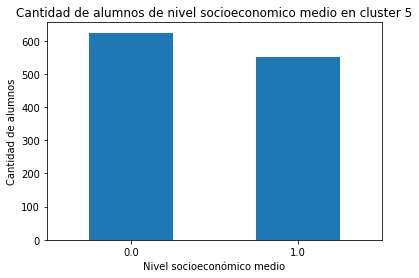

In [259]:
cluster_5.indice_socioeconomico_medio.value_counts().plot(kind='bar')
plt.title('Cantidad de alumnos de nivel socioeconomico medio en cluster 5')
plt.xlabel('Nivel socioeconómico medio',rotation=0)
plt.xticks(rotation=0)
plt.ylabel('Cantidad de alumnos')
plt.show()

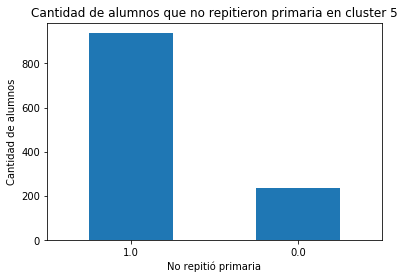

In [260]:
cluster_5.repeticion_primaria_no.value_counts().plot(kind='bar')
plt.title('Cantidad de alumnos que no repitieron primaria en cluster 5')
plt.xlabel('No repitió primaria',rotation=0)
plt.xticks(rotation=0)
plt.ylabel('Cantidad de alumnos')
plt.show()

Los alumnos del cluster 5 en general no repitieron primaria y tienen un nivel de desempeño por debajo del básico

## En resumen..

- CLUSTER 1:

Todos los alumnos de este cluster repitieron primaria. La mayoría son de un nivel socioeconómico medio.
En el cluster 1 pudimos identificar como tendencia que los alumnos repitieron primaria. No encontramos tendencias en el nivel de desempeño.

- CLUSTER 2:

En este cluster están los alumnos que son de un nivel socioeconómico medio y que no repitieron.

- CLUSTER 3:

En el cluster 3, tenemos a los alumnos que no repitieron primaria y que son de un nivel socioeconómico bajo

- CLUSTER 4:

Estos alumnos del cluster 4 tienen sobre todo nivel de desempeño bajo.
Los alumnos del cluster 4 repitieron primaria 3 veces o más. Pertenecen sobre todo a un indice socioeconómico medio.

- CLUSTER 5:

Los alumnos del cluster 5 en general no repitieron primaria y tienen un nivel de desempeño por debajo del básico

Todos los cluster tienen alumnos de todos los niveles de desempeño. En general, están agrupados teniendo en cuenta si repitieron primaria y su nivel socioeconómico. 
Esto nos parece poco explicativo, ya que no mejora el resultado obtenido con nuestro modelo benchmark (random forest).
Nuestra conclusión general de estos primero modelos generales es que es difícil predecir la performance de la totalidad de los alumnos encuestados en base a las variables existentes en nuestro modelo.
Antes de abrir teorías sobre cuáles son los datos faltantes para poder explicar dicha performace, decidimos intentar un modelo con un universo de análisis más acotado.

# Cambio de foco: Análisis de performance entre alumnos de indice socioeconómico bajo

Retomando nuestros primeros resultados del análisis exploratorio, podría haber una relación entre el nivel socioeconómico y las competencias en lengua. 
Sin embargo, esta relación dista de ser deterministica: hay alumnos de nivel socieconómico bajo que logran niveles satisfactorios y avanzados.
Nuestro interes es entonces comprender qué factores influyen en esto.
Comenzamos a analizar a los alumnos que pertenecen a un indice socioeconómico bajo, con el objetivo de encontrar cuales son los factores que influyen en este nivel socioeconómico, para que un alumno alcance el nivel "Avanzado" en Lengua.

Siempre teniendo en cuenta únicamente a alumnos de primaria y en los años 2016 y 2017

## Filtramos por indice_socioeconomico_bajo

In [261]:
is_bajo = data[(data['indice_socioeconomico'] == 'bajo') & (data['nivel_desemp_lengua'] != 'nc') & (~data['nivel_desemp_lengua'].isna())]

In [262]:
is_bajo.shape[0]

67221

Tenemos 67.221 datos de nivel de desempeño en lengua de alumnos de ***primaria*** que pertencen a un ***indice socioeconómico bajo***

## Nivel de desempeño

Encontramos diferencias en el porcentaje de alumnos con indice socioeconómico bajo que obtienen un nivel de desempeño alto y el porcentaje de alumnos deun indice socioeconómico superior que obtienen el mismo resultado.

#### Nivel socioeconómico bajo

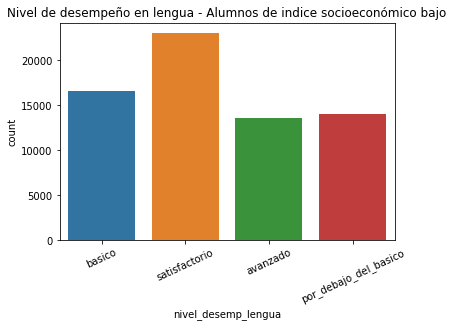

In [263]:
g = sns.countplot(x="nivel_desemp_lengua", data=is_bajo)
plt.title('Nivel de desempeño en lengua - Alumnos de indice socioeconómico bajo')
plt.xticks(rotation=25)
plt.show()

In [264]:
value_counts = pd.DataFrame(is_bajo.nivel_desemp_lengua.value_counts())
value_counts['porcentaje'] = (value_counts.nivel_desemp_lengua * 100) / is_bajo.shape[0]
value_counts

,nivel_desemp_lengua,porcentaje
satisfactorio,23001,34.22
basico,16649,24.77
por_debajo_del_basico,14002,20.83
avanzado,13569,20.19


#### Nivel socioeconómico superior

In [265]:
is_superior = data[(~data['indice_socioeconomico'].isin(['bajo','nc'])) & (data['nivel_desemp_lengua'] != 'nc') & (~data['nivel_desemp_lengua'].isna())]

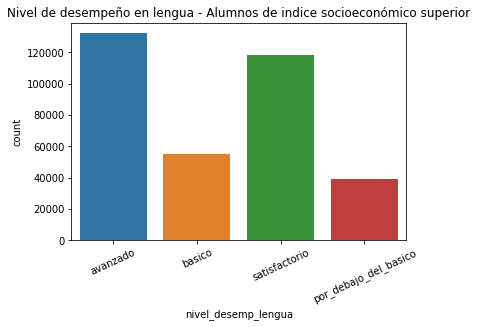

In [266]:
g = sns.countplot(x="nivel_desemp_lengua", data=is_superior)
plt.title('Nivel de desempeño en lengua - Alumnos de indice socioeconómico superior')
plt.xticks(rotation=25)
plt.show()

In [267]:
value_counts = pd.DataFrame(is_superior.nivel_desemp_lengua.value_counts())
value_counts['porcentaje'] = (value_counts.nivel_desemp_lengua * 100) / is_superior.shape[0]
value_counts

,nivel_desemp_lengua,porcentaje
avanzado,132101,38.28
satisfactorio,118605,34.37
basico,54930,15.92
por_debajo_del_basico,39431,11.43


En nivel socioeconómico bajo solo un 20.19% de alumnos alcanzar el nivel de desempeño avanzado, mientras que en niveles socioeconómicos superiores, el nivel de desempeño avanzado es el más común con un 38.28%

## Datos

In [268]:
nulls = pd.DataFrame(is_bajo.isnull().sum().sort_values(ascending=False), columns=['nulls'])
nulls['porcentaje'] = round(100*nulls['nulls'] / len(is_bajo), 2)
nulls[nulls.nulls>0]

,nulls,porcentaje
cargo_apoyo,30785,45.80
escuela_tiene_internet,7104,10.57
cargo_direccion,6575,9.78
escuela_icse_cat,4577,6.81
gasto_inicial_primaria,3443,5.12
cargo_frente_a_alumnos,1577,2.35
cant_alumnos_curso,51,0.08
departamento_tasa_con_nbi,11,0.02
escuela_subvencion,5,0.01
escuela_dependencia,5,0.01


Descartamos cargo_apoyo, la mitad de sus valores son nulos.

In [269]:
is_bajo = is_bajo.drop('cargo_apoyo', axis=1)

Completamos el resto de nulos

In [270]:
is_bajo.escuela_tiene_internet = is_bajo.escuela_tiene_internet.fillna('t')

In [271]:
is_bajo.cargo_direccion = is_bajo.cargo_direccion.fillna(np.mean(is_bajo.cargo_direccion))

In [272]:
is_bajo.escuela_icse_cat = is_bajo.escuela_icse_cat.fillna('bajo_y_medio')

In [273]:
is_bajo.gasto_inicial_primaria = is_bajo.gasto_inicial_primaria.fillna(14666816183.653673) #media

In [274]:
is_bajo.cargo_frente_a_alumnos = is_bajo.cargo_frente_a_alumnos.fillna(21) # Media

In [275]:
is_bajo = is_bajo.dropna()

In [276]:
nc = miss_data(is_bajo,'nc')
nc[nc.cantidad>0]

,cantidad,porcentaje
variable,,
sexo,12406,18.47
repeticion_primaria,4289,6.39


In [277]:
is_bajo = is_bajo.drop('sexo', axis=1)

A la variable repeticion_primaria la tomamos como 1 o 0 (repite/no repite)

In [278]:
rep_map = {
    'no': 0,
    'una_vez':1,
    'nc': 0,
    'dos_veces': 1,
    'tres_veces_o_mas':1
}
is_bajo.repeticion_primaria = is_bajo.repeticion_primaria.map(rep_map)

In [279]:
nc = miss_data(is_bajo,'No corresponde')
nc[nc.cantidad>0]

,cantidad,porcentaje
variable,,
escuela_subvencion,62634,93.25


Como el 93% de los casos son = 'No corresponde', decidimos descartar esta columna.

In [280]:
is_bajo = is_bajo.drop('escuela_subvencion', axis=1)

In [281]:
missing = miss_data(is_bajo, -1)
missing[missing.cantidad>0]

,cantidad,porcentaje
variable,,
departamento_tasa_con_nbi,20775,30.93
escuela_icse,4558,6.79


In [282]:
is_bajo[is_bajo.departamento_tasa_con_nbi > -1].departamento_tasa_con_nbi.describe()

count   46390.00
mean        0.12
std         0.07
min         0.02
25%         0.06
50%         0.10
75%         0.15
max         0.40
Name: departamento_tasa_con_nbi, dtype: float64

In [283]:
is_bajo.departamento_tasa_con_nbi = is_bajo.departamento_tasa_con_nbi.replace(to_replace = -1, value= 0.12)

Hay 10 filas donde el valor de cant_alumnos_curso es igual a 1. Las eliminamos

In [284]:
is_bajo = is_bajo[is_bajo.cant_alumnos_curso > 1]

In [285]:
sin_inf = miss_data(is_bajo, 'sin información')
sin_inf[sin_inf.cantidad>0]

,cantidad,porcentaje
variable,,
escuela_dependencia,2,0.00


In [286]:
is_bajo = is_bajo[is_bajo.escuela_dependencia != 'sin información']

In [287]:
is_bajo.head()

,indice_socioeconomico,nivel_desemp_lengua,ponderador_lengua,repeticion_primaria,escuela_id,nivel_id,year_id,escuela_ambito,escuela_gestion,escuela_icse,...,escuela_indice_socioeconomico_medio_cat,escuela_tecnica,escuela_tiene_internet,escuela_dependencia,provincia_id,departamento_tasa_con_nbi,cargo_direccion,cargo_frente_a_alumnos,cant_alumnos_curso,gasto_inicial_primaria
54,bajo,basico,1.32,1,240141612,2,2016,urbano,privada,-1.00,...,tercil_medio,f,t,provincial,4,0.16,2.00,32.00,1619.00,9998134731.00
58,bajo,satisfactorio,2.42,0,240616812,2,2016,urbano,estatal,0.15,...,tercil_medio,f,t,provincial,4,0.04,4.00,50.00,648.00,9998134731.00
61,bajo,basico,1.96,0,240984012,2,2016,urbano,estatal,0.08,...,tercil_alto,f,t,provincial,4,0.09,4.00,48.00,744.00,9998134731.00
90,bajo,basico,1.74,0,280999614,2,2016,urbano,estatal,0.04,...,tercil_alto,f,t,provincial,4,0.02,4.00,46.00,584.00,9998134731.00
116,bajo,basico,3.69,0,302760015,2,2016,urbano,estatal,0.20,...,tercil_medio,f,t,provincial,4,0.13,5.00,34.00,325.00,9998134731.00


In [288]:
is_bajo.describe()

,ponderador_lengua,repeticion_primaria,escuela_id,nivel_id,year_id,escuela_icse,escuela_indice_socioeconomico_medio,provincia_id,departamento_tasa_con_nbi,cargo_direccion,cargo_frente_a_alumnos,cant_alumnos_curso,gasto_inicial_primaria
count,67153.00,67153.00,67153.00,67153.00,67153.00,67153.00,67153.00,67153.00,67153.00,67153.00,67153.00,67153.00,67153.00
mean,1.60,0.22,9171324464.86,2.00,2016.00,0.31,1.69,9.48,0.12,3.18,21.58,412.86,14665322081.81
std,0.85,0.41,8062075619.23,0.00,0.00,0.39,0.31,7.91,0.06,2.07,13.58,307.09,14906342102.42
min,1.00,0.00,60000303.00,2.00,2016.00,-1.00,1.00,0.00,0.02,0.00,0.00,2.00,1193766949.00
25%,1.10,0.00,1945340832.00,2.00,2016.00,0.25,1.53,2.00,0.08,2.00,12.00,178.00,4764915887.00
50%,1.32,0.00,6080080016.00,2.00,2016.00,0.37,1.74,8.00,0.12,3.00,20.00,377.00,5958320664.00
75%,1.74,0.00,15123077228.00,2.00,2016.00,0.51,1.89,16.00,0.12,4.00,29.00,584.00,14666816183.65
max,25.92,1.00,34403992040.00,2.00,2016.00,0.91,2.84,23.00,0.40,52.00,108.00,3659.00,40563029196.00


Ya tenemos el dataset limpio sin faltantes. Ahora seleccionamos las columnas de interés

In [289]:
cols = ['nivel_desemp_lengua', 'ponderador_lengua','repeticion_primaria','escuela_ambito', 'escuela_gestion', 'escuela_icse_cat',
       'escuela_indice_socioeconomico_medio_cat','escuela_tiene_internet','escuela_dependencia',
       'departamento_tasa_con_nbi', 'cargo_direccion','cargo_frente_a_alumnos','cant_alumnos_curso']

In [290]:
data_is_bajo = is_bajo[cols]

Ahora calculamos el cargo_direccion por cantidad de alumnos y el cargo_frente_a_alumnos por cantidad de alumnos

In [291]:
data_is_bajo['cargo_direc_x_alumno'] = data_is_bajo['cargo_direccion'] / data_is_bajo['cant_alumnos_curso']
data_is_bajo['cargo_fa_x_alumno'] = data_is_bajo['cargo_frente_a_alumnos'] / data_is_bajo['cant_alumnos_curso']
data_is_bajo = data_is_bajo.drop(['cargo_frente_a_alumnos','cargo_direccion', 'cant_alumnos_curso'], axis=1)

Ahora tenemos que tratar las variables categóricas

In [292]:
target_name = 'nivel_desemp_lengua'
categ = [col for col in data_is_bajo.columns if (data_is_bajo[col].dtypes == 'object') & (col != target_name)]
data_is_bajo[categ].head()

,escuela_ambito,escuela_gestion,escuela_icse_cat,escuela_indice_socioeconomico_medio_cat,escuela_tiene_internet,escuela_dependencia
54,urbano,privada,bajo_y_medio,tercil_medio,t,provincial
58,urbano,estatal,bajo_y_medio,tercil_medio,t,provincial
61,urbano,estatal,bajo_y_medio,tercil_alto,t,provincial
90,urbano,estatal,bajo_y_medio,tercil_alto,t,provincial
116,urbano,estatal,bajo_y_medio,tercil_medio,t,provincial


En la variable objetivo, solo queremos identificar avanzados, por lo tanto, de las variables dummy solo tomamos avanzado

In [293]:
target_dummies = pd.get_dummies(data_is_bajo.nivel_desemp_lengua)
data_is_bajo = pd.concat([data_is_bajo, target_dummies[['avanzado']]], axis=1).drop(target_name, axis=1)

Ahora que ya tenemos nuestro target como 1 o 0 trabajamos el resto de las variables

In [294]:
categ

['escuela_ambito',
 'escuela_gestion',
 'escuela_icse_cat',
 'escuela_indice_socioeconomico_medio_cat',
 'escuela_tiene_internet',
 'escuela_dependencia']

In [295]:
escuela_ambito_map = {
    'urbano': 0,
    'rural':1
}
#Solo hay 33 casos en que escuela_gestion = social/cooperativa, por lo tanto le asignamos 0
escuela_gestion_map = {
    'estatal': 0,
    'privada': 1,
    'social/cooperativa': 0
}
escuela_tiene_internet_map = {
    't': 1,
    'f': 0
}
# Solo hay 9 casos en que escuela_dependencia = nacional. Le asignamos 0 igual que a provincial.
escuela_dependencia_map = {
    'provincial': 0,
    'municipal': 1,
    'nacional': 0
}

to_dummies = ['escuela_icse_cat','escuela_indice_socioeconomico_medio_cat']
dummies = pd.get_dummies(data_is_bajo[to_dummies])
data_is_bajo = pd.concat([data_is_bajo, dummies], axis=1).drop(to_dummies, axis=1)

data_is_bajo.escuela_ambito = data_is_bajo.escuela_ambito.map(escuela_ambito_map)
data_is_bajo.escuela_gestion = data_is_bajo.escuela_gestion.map(escuela_gestion_map)
data_is_bajo.escuela_tiene_internet = data_is_bajo.escuela_tiene_internet.map(escuela_tiene_internet_map)
data_is_bajo.escuela_dependencia = data_is_bajo.escuela_dependencia.map(escuela_dependencia_map)

data_is_bajo.head()

,ponderador_lengua,repeticion_primaria,escuela_ambito,escuela_gestion,escuela_tiene_internet,escuela_dependencia,departamento_tasa_con_nbi,cargo_direc_x_alumno,cargo_fa_x_alumno,avanzado,escuela_icse_cat_alto,escuela_icse_cat_bajo_y_medio,escuela_icse_cat_critico,escuela_indice_socioeconomico_medio_cat_tercil_alto,escuela_indice_socioeconomico_medio_cat_tercil_bajo,escuela_indice_socioeconomico_medio_cat_tercil_medio
54,1.32,1,0,1,1,0,0.16,0.00,0.02,0,0,1,0,0,0,1
58,2.42,0,0,0,1,0,0.04,0.01,0.08,0,0,1,0,0,0,1
61,1.96,0,0,0,1,0,0.09,0.01,0.06,0,0,1,0,1,0,0
90,1.74,0,0,0,1,0,0.02,0.01,0.08,0,0,1,0,1,0,0
116,3.69,0,0,0,1,0,0.13,0.02,0.10,0,0,1,0,0,0,1


Las escuelas social/cooperativa no son ni estatales ni privadas pero casi siempre reciben subvencion del estado. Por lo tanto las agrupamos con estatales.

## Train/Test split

In [296]:
data_shuffle = data_is_bajo.sample(frac=1)

size = data_shuffle.shape[0]
train_size = round(size * 0.8)

X = data_shuffle.drop(['avanzado','ponderador_lengua'], axis=1)
y = data_shuffle[['avanzado']]
ponder = data_shuffle[['ponderador_lengua']]

X_train = X[:train_size]
y_train = y[:train_size]
ponder_train = ponder[:train_size]

X_test = X[train_size:]
y_test = y[train_size:]
ponder_test = ponder[train_size:]

## Random forest classifier

In [297]:
rf = RandomForestClassifier(n_estimators=2500, random_state=33)
rf.fit(X_train, y_train, sample_weight=ponder_train.values.flatten())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2500,
                       n_jobs=None, oob_score=False, random_state=33, verbose=0,
                       warm_start=False)

In [298]:
rf.score(X_test, y_test, sample_weight=ponder_test.values.flatten())

0.7782255821249034

In [299]:
from sklearn.metrics import classification_report
test_preds = rf.predict(X_test)
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87     10745
           1       0.42      0.25      0.31      2686

    accuracy                           0.78     13431
   macro avg       0.62      0.58      0.59     13431
weighted avg       0.75      0.78      0.76     13431



## Logistic regression

In [300]:
data_is_bajo.avanzado.value_counts()

0    53611
1    13542
Name: avanzado, dtype: int64

In [301]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=33).fit(X_train, y_train, sample_weight=ponder_train.values.flatten())

test_preds = clf.predict(X_test)

In [302]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89     10745
           1       0.53      0.03      0.06      2686

    accuracy                           0.80     13431
   macro avg       0.67      0.51      0.48     13431
weighted avg       0.75      0.80      0.72     13431



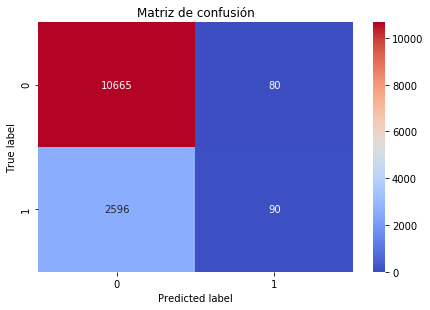

In [303]:
test_preds = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, test_preds)

sns.heatmap(conf_matrix, annot=True, vmin=0,fmt='g', cmap='coolwarm',)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Matriz de confusión')
plt.show()

Al tener las clases tan desbalanceadas, el modelo tiene un recall casi nulo para la categoría 1.

## Undersampling

Los datos están desbalanceados por lo que probamos usar undersampling para balancear el dataset.

In [304]:
balance_df = data_is_bajo.sample(frac=1)

In [305]:
mask = balance_df.avanzado == 1

balance_df = pd.concat([balance_df[mask], balance_df[~mask].sample(n = mask.sum())])
balance_df = balance_df.sample(frac=1,  random_state=42).reset_index(drop=True)
balance_df.shape

(27084, 16)

In [306]:
balance_df.avanzado.value_counts()

1    13542
0    13542
Name: avanzado, dtype: int64

Tratamos de predecir sobre estos datos

In [307]:
size = balance_df.shape[0]
train_size = round(size * 0.85)

X_b = balance_df.drop(['avanzado','ponderador_lengua'], axis=1)
y_b = balance_df[['avanzado']]
ponder_b = balance_df[['ponderador_lengua']]

X_train_b = X_b[:train_size]
y_train_b = y_b[:train_size]
ponder_train_b = ponder_b[:train_size]

X_test_b = X_b[train_size:]
y_test_b = y_b[train_size:]
ponder_test_b = ponder_b[train_size:]

## Random forest classifier dataset balanceado

In [308]:
rf = RandomForestClassifier(n_estimators=2500, random_state=33)
rf.fit(X_train_b, y_train_b, sample_weight=ponder_train_b.values.flatten())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2500,
                       n_jobs=None, oob_score=False, random_state=33, verbose=0,
                       warm_start=False)

In [309]:
test_preds_b = rf.predict(X_test_b)
print(classification_report(y_test_b, test_preds_b))

              precision    recall  f1-score   support

           0       0.62      0.63      0.63      2061
           1       0.61      0.61      0.61      2002

    accuracy                           0.62      4063
   macro avg       0.62      0.62      0.62      4063
weighted avg       0.62      0.62      0.62      4063



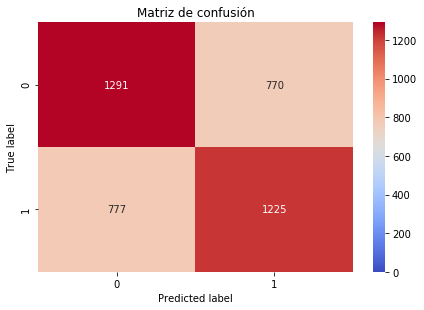

In [310]:
conf_matrix = confusion_matrix(y_test_b, test_preds_b)

sns.heatmap(conf_matrix, annot=True, vmin=0,fmt='g', cmap='coolwarm')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Matriz de confusión')
plt.show()

Text(0.5, 0, 'Importance')

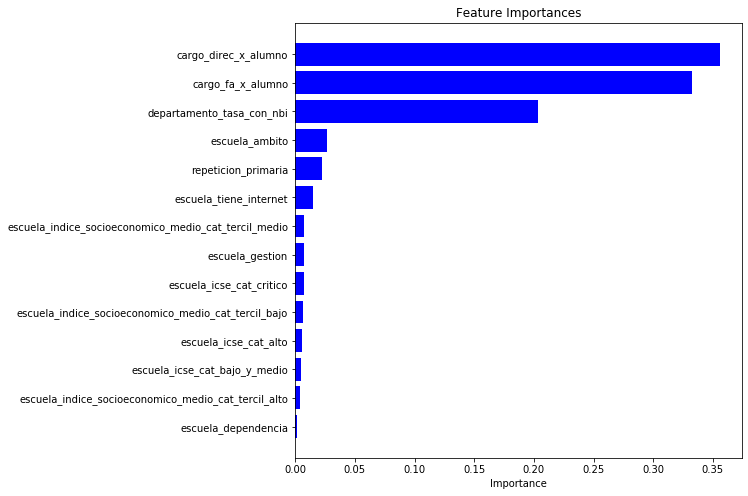

In [311]:
features= X_b.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(1, figsize=(8, 8))
plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Importance')

Todavía no alcanzamos un buen modelo para poder distinguir cuales son las características que hacen que un alumno de indice socioeconomico bajo pueda alcanzar un nivel de desempeño avanzado.

Decidimos seguir el análisis con alumnos de nivel socioeconómico bajo, dividiendo los grupos en 2 niveles de desempeño:
 - Nivel de desempeño básico o por debajo del básico
 - Nivel de desempeño satisfactorio o avanzado

Tomamos los datos preprocesados del análisis anterior, pero en este caso en lugar de tomar como target solamente el nivel avanzado, hacemos la distinción en 2 clases.

In [312]:
data_is_bajo_bi = pd.concat([data_is_bajo, target_dummies[['basico','por_debajo_del_basico','satisfactorio']]], axis=1)

In [313]:
data_is_bajo_bi.head(5)

,ponderador_lengua,repeticion_primaria,escuela_ambito,escuela_gestion,escuela_tiene_internet,escuela_dependencia,departamento_tasa_con_nbi,cargo_direc_x_alumno,cargo_fa_x_alumno,avanzado,escuela_icse_cat_alto,escuela_icse_cat_bajo_y_medio,escuela_icse_cat_critico,escuela_indice_socioeconomico_medio_cat_tercil_alto,escuela_indice_socioeconomico_medio_cat_tercil_bajo,escuela_indice_socioeconomico_medio_cat_tercil_medio,basico,por_debajo_del_basico,satisfactorio
54,1.32,1,0,1,1,0,0.16,0.00,0.02,0,0,1,0,0,0,1,1,0,0
58,2.42,0,0,0,1,0,0.04,0.01,0.08,0,0,1,0,0,0,1,0,0,1
61,1.96,0,0,0,1,0,0.09,0.01,0.06,0,0,1,0,1,0,0,1,0,0
90,1.74,0,0,0,1,0,0.02,0.01,0.08,0,0,1,0,1,0,0,1,0,0
116,3.69,0,0,0,1,0,0.13,0.02,0.10,0,0,1,0,0,0,1,1,0,0


In [314]:
reconstruct_dummies = target_dummies.idxmax(axis=1)
reconstruct_dummies.value_counts()

satisfactorio            22981
basico                   16634
por_debajo_del_basico    13996
avanzado                 13542
dtype: int64

In [315]:
target_map = {
    'satisfactorio':1,
    'avanzado':1,
    'basico':0,
    'por_debajo_del_basico':0
}

In [316]:
data_is_bajo_bi['desemp'] = reconstruct_dummies
data_is_bajo_bi = data_is_bajo_bi.drop(['basico','por_debajo_del_basico','satisfactorio','avanzado'], axis=1)
data_is_bajo_bi.desemp = data_is_bajo_bi.desemp.map(target_map)
data_is_bajo_bi.head()

,ponderador_lengua,repeticion_primaria,escuela_ambito,escuela_gestion,escuela_tiene_internet,escuela_dependencia,departamento_tasa_con_nbi,cargo_direc_x_alumno,cargo_fa_x_alumno,escuela_icse_cat_alto,escuela_icse_cat_bajo_y_medio,escuela_icse_cat_critico,escuela_indice_socioeconomico_medio_cat_tercil_alto,escuela_indice_socioeconomico_medio_cat_tercil_bajo,escuela_indice_socioeconomico_medio_cat_tercil_medio,desemp
54,1.32,1,0,1,1,0,0.16,0.00,0.02,0,1,0,0,0,1,0
58,2.42,0,0,0,1,0,0.04,0.01,0.08,0,1,0,0,0,1,1
61,1.96,0,0,0,1,0,0.09,0.01,0.06,0,1,0,1,0,0,0
90,1.74,0,0,0,1,0,0.02,0.01,0.08,0,1,0,1,0,0,0
116,3.69,0,0,0,1,0,0.13,0.02,0.10,0,1,0,0,0,1,0


In [317]:
data_is_bajo_bi.desemp.value_counts()

1    36523
0    30630
Name: desemp, dtype: int64

Las clases están más balanceadas que en el caso anterior

## Train/Test split

In [318]:
size = data_is_bajo_bi.shape[0]
train_size = round(size * 0.85)

X = data_is_bajo_bi.drop(['desemp','ponderador_lengua'], axis=1)
y = data_is_bajo_bi[['desemp']]
ponder = data_is_bajo_bi[['ponderador_lengua']]

X_train = X[:train_size]
y_train = y[:train_size]
ponder_train = ponder[:train_size]

X_test = X[train_size:]
y_test = y[train_size:]
ponder_test = ponder[train_size:]

## Random forest classifier

In [319]:
rf = RandomForestClassifier(n_estimators=2500, random_state=33)
rf.fit(X_train, y_train, sample_weight=ponder_train.values.flatten())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2500,
                       n_jobs=None, oob_score=False, random_state=33, verbose=0,
                       warm_start=False)

In [320]:
test_preds = rf.predict(X_test)
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.54      0.53      0.53      4606
           1       0.61      0.62      0.61      5467

    accuracy                           0.58     10073
   macro avg       0.57      0.57      0.57     10073
weighted avg       0.58      0.58      0.58     10073



In [323]:
train_preds = rf.predict(X_train)
print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

           0       0.75      0.72      0.73     26024
           1       0.77      0.80      0.78     31056

    accuracy                           0.76     57080
   macro avg       0.76      0.76      0.76     57080
weighted avg       0.76      0.76      0.76     57080



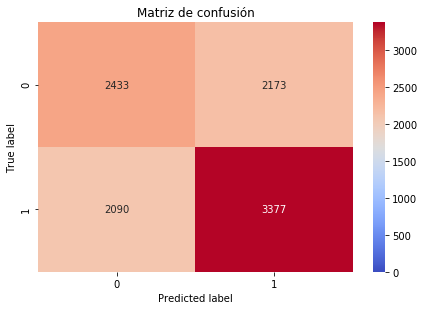

In [321]:
conf_matrix = confusion_matrix(y_test, test_preds)

sns.heatmap(conf_matrix, annot=True, vmin=0,fmt='g', cmap='coolwarm')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Matriz de confusión')
plt.show()

Text(0.5, 0, 'Importance')

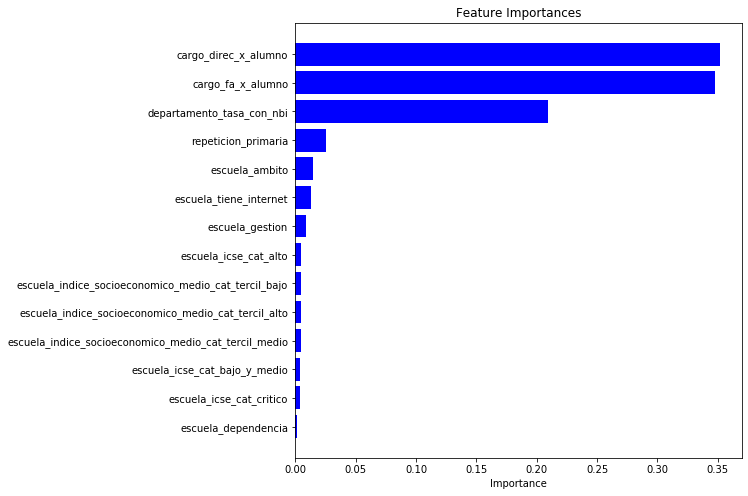

In [322]:
features= X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(1, figsize=(8, 8))
plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Importance')